In [1]:
import pandas as pd
import numpy as np
import os
import PyPDF2

In [ ]:
PDF_PATH = 'pdfs/'
OUTPUT_PATH = 'datasets/'
DATA_PATH = 'pdfs/data/'
os.makedirs("output", exist_ok=True)

***Extract for GII 2014,2015,2016,2017 data***

In [3]:
import pdfplumber
import re
import csv

# Function to save data to CSV
def save_data_to_csv(data, csv_file_path):
	with open(csv_file_path, mode='w', newline='', encoding="utf-8-sig") as f:
		writer = csv.writer(f)
		writer.writerow(["Economy", "IndNum", "IndName", "Score", "Rank"])
		for country_name, content in data.items():
			gii_title, gii_score, gii_rank = content["GII"]
			writer.writerow([country_name, "0", gii_title, gii_score, gii_rank])
			for detail in content["detail"]:
				ind_num, ind_name, rank, score = detail
				writer.writerow([country_name, ind_num, ind_name, rank, score])
		print(f"Data saved to {csv_file_path}")

# Function to parse country name
def parse_country(lines):
	for i, line in enumerate(lines):
		if "seliforP" in line:
			if i+8 < len(lines):
				match = re.findall(r"[A-Za-z]+", lines[i + 8])
				if match:
					return " ".join(match)

# Function to parse GII
def parse_GII(lines):
	for line in lines:
		GII_pattern = re.compile(
		r'(Global Innovation Index(?: \(out of \d+\))?)'  
		r'.*?\.{3,}\s*'                      
		r'([\d,.\-n/a]+)\s+([\d,.\-n/a]+)'
		)
		match = GII_pattern.search(line)
		if match:
			return match.groups()

# Function to extract detail data from PDF	
def extract_data_from_pdf(pdf_file_path):
	with pdfplumber.open(pdf_file_path) as pdf:
		data ={}
		for page in pdf.pages:
			text = page.extract_text()
			lines = text.split("\n")
			country_name = parse_country(lines)
			Gii = parse_GII(lines)
			data.setdefault(country_name,{})
			data[country_name]["GII"] = Gii
			common_pattern = re.compile(
			r'.*?'                      # Skip any leading characters (non-greedy)
			r'(\d+(?:\.\d+)*)\s+'       # Match version/number (e.g., 1, 4.2.1)
			r'([A-Za-z].*?)'            # Title starting with a letter
			r'\.{3,}\s*'                # Match ellipsis (...)
			r'([\d,.\-n/a]+)\s+'        # First value (e.g., 58.8)
			r'([\d,.\-n/a]+)'           # Second value (e.g., 79)
			)
			matches = []
			for line in lines:
				match = common_pattern.findall(line)
				if match:
					for m in match:
						matches.append(m)
			sorted_matches = sorted(matches, key=lambda x: tuple(map(int, x[0].split('.'))))
			data[country_name]["detail"] = sorted_matches
		return data

In [4]:
pdf_file_names = [f for f in os.listdir(DATA_PATH) if f.endswith('.pdf')]
pdf_file_names = pdf_file_names[:4]
print(pdf_file_names)
for pdf_file_name in pdf_file_names:
	pdf_file_path = DATA_PATH + pdf_file_name
	data = extract_data_from_pdf(pdf_file_path)
	csv_file_path = OUTPUT_PATH + os.path.splitext(pdf_file_name)[0] + ".csv"
	save_data_to_csv(data, csv_file_path)


['2014.pdf', '2015.pdf', '2016.pdf', '2017.pdf']
Data saved to output/2014.csv
Data saved to output/2015.csv
Data saved to output/2016.csv
Data saved to output/2017.csv


***Extract for GII 2018 data***

In [ ]:
def parse_Institutions(lines):
	for line in lines:
		institutions_pattern = re.compile(
    r'(Institutions)'       # Capture the literal "Institutions"
    r'\s*\.{3,}\s*'         # Match a run of dots (and any spaces around it)
    r'([\d,.\-n/a]+)'       # Capture the score (numbers, decimal, or 'n/a')
    r'\s+'                  # At least one space
    r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
		re.IGNORECASE
		)
		match = institutions_pattern.search(line)
		if match:
			return match.groups()

def parse_human_capital(lines):
	for line in lines:
		human_capital_pattern = re.compile(
		r'(Human capital & research)'  # Capture the literal "Human Capital and Research"
		r'\s*\.{3,}\s*'                 # Match a run of dots (and any spaces around it)
		r'([\d,.\-n/a]+)'               # Capture the score (numbers, decimal, or 'n/a')
		r'\s+'                          # At least one space
		r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
		re.IGNORECASE
		)
		match = human_capital_pattern.search(line)
		if match:
			return match.groups()

def parse_infrastructure(lines):
	for line in lines:
		infrastructure_pattern = re.compile(
		r'(Infrastructure)'             # Capture the literal "Infrastructure"
		r'\s*\.{3,}\s*'                 # Match a run of dots (and any spaces around it)
		r'([\d,.\-n/a]+)'               # Capture the score (numbers, decimal, or 'n/a')
		r'\s+'                          # At least one space
		r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
		re.IGNORECASE
		)
		match = infrastructure_pattern.search(line)
		if match:
			return match.groups()

def parse_market_sophistication(lines):
	for line in lines:
		market_sophistication_pattern = re.compile(
		r'(Market sophistication)'       # Capture the literal "Market Sophistication"
		r'\s*\.{3,}\s*'                 # Match a run of dots (and any spaces around it)
		r'([\d,.\-n/a]+)'               # Capture the score (numbers, decimal, or 'n/a')
		r'\s+'                          # At least one space
		r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
		re.IGNORECASE
		)
		match = market_sophistication_pattern.search(line)
		if match:
			return match.groups()
		
def parse_business_sophistication(lines):
	for line in lines:
		business_sophistication_pattern = re.compile(
		r'(Business sophistication)'     # Capture the literal "Business Sophistication"
		r'\s*\.{3,}\s*'                 # Match a run of dots (and any spaces around it)
		r'([\d,.\-n/a]+)'               # Capture the score (numbers, decimal, or 'n/a')
		r'\s+'                          # At least one space
		r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
		re.IGNORECASE
		)
		match = business_sophistication_pattern.search(line)
		if match:
			return match.groups()
		
def parse_knowledge_tech_outputs(lines):
	for line in lines:
		knowledge_tech_outputs_pattern = re.compile(
		r'(Knowledge & technology outputs)'  # Capture the literal "Knowledge & Technology Outputs"
		r'\s*\.{3,}\s*'                     # Match a run of dots (and any spaces around it)
		r'([\d,.\-n/a]+)'                   # Capture the score (numbers, decimal, or 'n/a')
		r'\s+'                              # At least one space
		r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
		re.IGNORECASE
		)
		match = knowledge_tech_outputs_pattern.search(line)
		if match:
			return match.groups()
		
def parse_creative_outputs(lines):
	for line in lines:
		creative_outputs_pattern = re.compile(
		r'(Creative outputs)'                # Capture the literal "Creative Outputs"
		r'\s*\.{3,}\s*'                      # Match a run of dots (and any spaces around it)
		r'([\d,.\-n/a]+)'                    # Capture the score (numbers, decimal, or 'n/a')
		r'\s+'                               # At least one space
		r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
		re.IGNORECASE
		)
		match = creative_outputs_pattern.search(line)
		if match:
			return match.groups()

def extract_data_from_pdf_after_2018(pdf_file_name):
	file_path = DATA_PATH + pdf_file_name
	with pdfplumber.open(file_path) as pdf:
		data ={}
		for page in pdf.pages:
			text = page.extract_text()
			lines = text.split("\n")
			country_name = lines[0]
			Gii = lines[2]
			data.setdefault(country_name,{})
			data[country_name]["GII"] = ("Global Innovation Index", "n/a", Gii)
			matches = []
			institutions = parse_Institutions(lines)
			if institutions:
				matches.append(("1", institutions[0], institutions[1], institutions[2]))
			else:
				print(f"Could not find Institutions data for {country_name} in {pdf_file_name}")
			human_capital = parse_human_capital(lines)
			if human_capital:
				matches.append(("2", human_capital[0], human_capital[1], human_capital[2]))
			else:
				print(f"Could not find Human Capital data for {country_name} in {pdf_file_name}")
			infrastructure = parse_infrastructure(lines)
			if infrastructure:
				matches.append(("3", infrastructure[0], infrastructure[1], infrastructure[2]))
			else:
				print(f"Could not find Infrastructure data for {country_name} in {pdf_file_name}")
			market_sophistication = parse_market_sophistication(lines)
			if market_sophistication:
				matches.append(("4", market_sophistication[0], market_sophistication[1], market_sophistication[2]))
			else:
				print(f"Could not find Market Sophistication data for {country_name} in {pdf_file_name}")
			business_sophistication = parse_business_sophistication(lines)
			if business_sophistication:
				matches.append(("5", business_sophistication[0], business_sophistication[1], business_sophistication[2]))
			else:
				print(f"Could not find Business Sophistication data for {country_name} in {pdf_file_name}")
			knowledge_tech_outputs = parse_knowledge_tech_outputs(lines)
			if knowledge_tech_outputs:
				matches.append(("6", knowledge_tech_outputs[0], knowledge_tech_outputs[1], knowledge_tech_outputs[2]))
			else:
				print(f"Could not find Knowledge & Technology Outputs data for {country_name} in {pdf_file_name}")
			creative_outputs = parse_creative_outputs(lines)
			if creative_outputs:
				matches.append(("7", creative_outputs[0], creative_outputs[1], creative_outputs[2]))
			else:
				print(f"Could not find Creative Outputs data for {country_name} in {pdf_file_name}")
			common_pattern = re.compile(
				r'.*?'                      # Skip any leading characters (non-greedy)
				r'(\d+(?:\.\d+)*)\s+'       # Match version/number (e.g., 1, 4.2.1)
				r'([A-Za-z].*?)'            # Title starting with a letter
				r'\.{3,}\s*'                # Match ellipsis (...)
				r'([\d,.\-n/a]+)\s+'        # First value (e.g., 58.8)
				r'\[?([\d,.\-n/a]+)\]?',         # 2nd numeric capture (rank), with optional [ ]
				re.IGNORECASE
				)
			for line in lines:
				match = common_pattern.findall(line)
				if match:
					for m in match:
						matches.append(m)
			sorted_matches = sorted(matches, key=lambda x: tuple(map(int, x[0].split('.'))))
			data[country_name]["detail"] = sorted_matches
		csv_file_path = "datasets/" + os.path.splitext(pdf_file_name)[0] + ".csv"
		save_data_to_csv(data, csv_file_path)

extract_data_from_pdf_after_2018("2018.pdf")

Data saved to output/2018.csv


***Extract for GII 2019 & 2020 data***

In [6]:
def clean_text(line):
	line = re.sub(r'\(cid:\d+\)', '', line)
	line = line.replace('🕘🕘', '')
	line = line.replace("◇", "")
	line = line.replace("○", "")
	line = line.replace("●", "")
	line = line.replace("◆", "")
	dot_chars = r'[.\u2026\uFF0E]'
	
	# Step 1: Mark valid decimal dots (a dot-like character between two digits)
	line = re.sub(r'(?<=\d)' + dot_chars + r'(?=\d)', '__DOT__', line)
	
	# Step 2: Remove any remaining dot-like sequences (one or more occurrences)
	line = re.sub(dot_chars + r'+', '', line)
	
	# Step 3: Restore the preserved decimal dots
	line = line.replace('__DOT__', '.')

	return line

expected = {
    "1": ("Institutions", "INSTITUTIONS"),
    "2": ("Human capital & research", "RESEARCH"),
    "3": ("Infrastructure", "INFRASTRUCTURE"),
    "4": ("Market sophistication", "MARKET SOPHISTICATION"),
    "5": ("Business sophistication", "BUSINESS SOPHISTICATION"),
    "6": ("Knowledge & technology outputs", "TECHNOLOGY OUTPUTS"),
    "7": ("Creative outputs", "CREATIVE OUTPUTS")
}

# Change path for 2019
with pdfplumber.open(DATA_PATH + "2019.pdf") as pdf:
	data = {}
	for page in pdf.pages:
		text = page.extract_text()
		lines = text.split("\n")
		cleaned_lines = []
		for line in lines:
			cleaned_lines.append(clean_text(line))

		country_pattern = re.compile(r'^(?P<before>.+?)(?=\s+GII)', re.IGNORECASE)
		country_match = country_pattern.match(lines[0])
		if country_match:
			country_name = country_match.group("before")
			data[country_name] = {}
			gii = lines[1]
			data[country_name]["GII"] = ("Global Innovation Index", "n/a", gii)

			matches = []
			common_pattern = re.compile(
				r'.*?'                      # Skip any leading characters (non-greedy)
				r'(\d+\.\d+(?:\.\d+)?)\s+'       # Match version/number (e.g., 1, 4.2.1)
				r'([A-Za-z].*?)\s+'            # Title starting with a letter
				r'((?:\d+(?:\.\d+)?)|n/a)\s+'        # First value: a float (e.g., 58.8) or "n/a")
				r'\[?((?:\d+|n/a))\]?',         # 2nd numeric capture (rank), with optional [ ]
				re.IGNORECASE
			)
			for line in cleaned_lines:
				match = common_pattern.findall(line)
				if match:
					for m in match:
						matches.append(m)
			found = {}
			big_title_pattern = re.compile(
				r'([A-Z]{5,}(?:\s+[A-Z]{5,})?)\s+'  # One word of 5+ letters, optionally followed by another word of 5+ letters
				r'(\d+(?:\.\d+)?)\s+'         # Capture the first number (integer or decimal)
				r'(\d+(?:\.\d+)?)'            # Capture the second number (integer or decimal)
				)
			for line in cleaned_lines:
				match = big_title_pattern.findall(line)
				if match:
					for m in match:
						if m[0] == "INSTITUTIONS":
							item = ("1", "Institutions", m[1], m[2])
						elif m[0] == "RESEARCH":
							item = ("2", "Human capital & research", m[1], m[2])
						elif m[0] == "INFRASTRUCTURE":
							item = ("3", "Infrastructure", m[1], m[2])
						elif m[0] == "MARKET SOPHISTICATION":
							item = ("4", "Market sophistication", m[1], m[2])
						elif m[0] == "BUSINESS SOPHISTICATION":
							item = ("5", "Business sophistication", m[1], m[2])
						elif m[0] == "TECHNOLOGY OUTPUTS":
							item = ("6", "Knowledge & technology outputs", m[1], m[2])
						elif m[0] == "CREATIVE OUTPUTS":
							item = ("7", "Creative outputs", m[1], m[2])
						else:
							continue
						found[item[0]] = item
			for key in sorted(expected.keys(), key=lambda k:int(k)):
				if key in found:
					matches.append(found[key])
				else:
					label = expected[key][0]
					matches.append((key, label, None, None))
			sorted_matches = sorted(matches, key=lambda x: tuple(map(int, x[0].split('.'))))
			data[country_name]["detail"] = sorted_matches
csv_file_path = "output/" + os.path.splitext("2019.pdf")[0] + ".csv"
save_data_to_csv(data, csv_file_path)

Data saved to output/2019.csv


In [7]:
# Change path for 2020
with pdfplumber.open(DATA_PATH + "2020.pdf") as pdf:
	data = {}
	for page in pdf.pages:
		text = page.extract_text()
		lines = text.split("\n")
		cleaned_lines = []
		for line in lines:
			cleaned_lines.append(clean_text(line))

		country_pattern = re.compile(r'^(?P<before>.+?)(?=\s+GII)', re.IGNORECASE)
		country_match = country_pattern.match(lines[0])
		if country_match:
			country_name = country_match.group("before")
			data[country_name] = {}
			gii = lines[1]
			data[country_name]["GII"] = ("Global Innovation Index", "n/a", gii)

			matches = []
			common_pattern = re.compile(
				r'.*?'                      # Skip any leading characters (non-greedy)
				r'(\d+\.\d+(?:\.\d+)?)\s+'       # Match version/number (e.g., 1, 4.2.1)
				r'([A-Za-z].*?)\s+'            # Title starting with a letter
				r'((?:\d+(?:\.\d+)?)|n/a)\s+'        # First value: a float (e.g., 58.8) or "n/a")
				r'\[?((?:\d+|n/a))\]?',         # 2nd numeric capture (rank), with optional [ ]
				re.IGNORECASE
			)
			for line in cleaned_lines:
				match = common_pattern.findall(line)
				if match:
					for m in match:
						matches.append(m)
			found = {}
			big_title_pattern = re.compile(
				r'([A-Z]{5,}(?:\s+[A-Z]{5,})?)\s+'  # One word of 5+ letters, optionally followed by another word of 5+ letters
				r'(\d+(?:\.\d+)?)\s+'         # Capture the first number (integer or decimal)
				r'(\d+(?:\.\d+)?)'            # Capture the second number (integer or decimal)
				)
			for line in cleaned_lines:
				match = big_title_pattern.findall(line)
				if match:
					for m in match:
						if m[0] == "INSTITUTIONS":
							item = ("1", "Institutions", m[1], m[2])
						elif m[0] == "RESEARCH":
							item = ("2", "Human capital & research", m[1], m[2])
						elif m[0] == "INFRASTRUCTURE":
							item = ("3", "Infrastructure", m[1], m[2])
						elif m[0] == "MARKET SOPHISTICATION":
							item = ("4", "Market sophistication", m[1], m[2])
						elif m[0] == "BUSINESS SOPHISTICATION":
							item = ("5", "Business sophistication", m[1], m[2])
						elif m[0] == "TECHNOLOGY OUTPUTS":
							item = ("6", "Knowledge & technology outputs", m[1], m[2])
						elif m[0] == "CREATIVE OUTPUTS":
							item = ("7", "Creative outputs", m[1], m[2])
						else:
							continue
						found[item[0]] = item
			for key in sorted(expected.keys(), key=lambda k:int(k)):
				if key in found:
					matches.append(found[key])
				else:
					label = expected[key][0]
					matches.append((key, label, None, None))
			sorted_matches = sorted(matches, key=lambda x: tuple(map(int, x[0].split('.'))))
			data[country_name]["detail"] = sorted_matches
csv_file_path = "output/" + os.path.splitext("2020.pdf")[0] + ".csv"
save_data_to_csv(data, csv_file_path)

Data saved to output/2020.csv


In [8]:
csv_file_path = {
  "2014": "datasets/2014.csv",
  "2015": "datasets/2015.csv",
  "2016": "datasets/2016.csv",
  "2017": "datasets/2017.csv",
  "2018": "datasets/2018.csv",
  "2019": "datasets/2019.csv",
  "2020": "datasets/2020.csv",
}

pillar_names = {
  "GII Overall": "Global Innovation Index",
  "Institutions": "Institutions",
  "Human Capital and Research": "Human capital & research",
  "Infrastructure": "Infrastructure",
  "Market Sophistication": "Market sophistication",
  "Business Sophistication": "Business sophistication",
  "Knowledge and Tech Outputs": "Knowledge & technology outputs",
  "Creative Outputs": "Creative outputs"
}

def extract_country_pillar_ranks(csv_file_path, year):
    df = pd.read_csv(csv_file_path, encoding="utf-8-sig")
    countries = df["Economy"].dropna().unique()
    results = []

    for country in countries:
        country_result = {"Year": year, "Economy": country}

        for short_name, full_name in pillar_names.items():
            if short_name == "GII Overall":
                match = df[
                    (df["Economy"] == country) &
                    (df["IndName"].str.lower().str.contains("global innovation index", na=False))
                ]
            else:
                match = df[
                    (df["Economy"] == country) &
                    (df["IndName"].str.lower().str.strip() == full_name.lower())
                ]

            country_result[short_name] = match["Rank"].values[0] if not match.empty else None

        results.append(country_result)

    return results


In [9]:
all_pillar_ranks_2014_to_2020 = []

for year in csv_file_path:
    yearly_data = extract_country_pillar_ranks(csv_file_path[year], int(year))
    all_pillar_ranks_2014_to_2020.extend(yearly_data)

pillar_ranks_df_2014_to_2020 = pd.DataFrame(all_pillar_ranks_2014_to_2020)
pillar_ranks_df_2014_to_2020

,Year,Economy,GII Overall,Institutions,Human Capital and Research,Infrastructure,Market Sophistication,Business Sophistication,Knowledge and Tech Outputs,Creative Outputs
0,2014,Albania,94.0,79.0,93.0,79.0,21.0,115.0,111.0,123.0
1,2014,Algeria,133.0,118.0,82.0,86.0,138.0,137.0,114.0,138.0
2,2014,Angola,135.0,136.0,129.0,137.0,107.0,135.0,83.0,127.0
3,2014,Argentina,70.0,111.0,41.0,65.0,132.0,66.0,81.0,49.0
4,2014,Armenia,65.0,58.0,99.0,93.0,56.0,90.0,51.0,63.0
...,...,...,...,...,...,...,...,...,...,...
919,2020,UZBEKISTAN,93.0,95.0,77.0,72.0,27.0,NaN,90.0,127.0
920,2020,VIET NAM,42.0,83.0,79.0,73.0,34.0,39.0,37.0,38.0
921,2020,YEMEN,131.0,131.0,NaN,129.0,129.0,NaN,128.0,124.0
922,2020,ZAMBIA,122.0,122.0,NaN,107.0,85.0,91.0,123.0,126.0


In [10]:
pillar_names = {
  "GII Overall": "Global Innovation Index",
  "Institutions": "Institutions",
  "Human Capital and Research": "Human capital and research",
  "Infrastructure": "Infrastructure",
  "Market Sophistication": "Market sophistication",
  "Business Sophistication": "Business sophistication",
  "Knowledge and Tech Outputs": "Knowledge and technology outputs",
  "Creative Outputs": "Creative outputs"
}
df_2021 = pd.read_excel("datasets/wipo_pub-2000-2021-tech1.xlsx", sheet_name="GII 2021 Data")

df_2021_results = []
df_2021_countries = df_2021["Economy"].dropna().unique()
for country in df_2021_countries:
		country_result = {"Year": 2021, "Economy": country}
		for short_name, full_name in pillar_names.items():
				if short_name == "GII Overall":
						match = df_2021[
								(df_2021["Economy"] == country) &
								(df_2021["IndName"].str.lower().str.contains("global innovation index", na=False))
						]
				else:
						match = df_2021[
								(df_2021["Economy"] == country) &
								(df_2021["IndName"].str.lower().str.strip() == full_name.lower())
						]

				country_result[short_name] = match["Rank"].values[0] if not match.empty else None

		df_2021_results.append(country_result)

df_2021_pillar_ranks_df = pd.DataFrame(df_2021_results)
df_2021_pillar_ranks_df


,Year,Economy,GII Overall,Institutions,Human Capital and Research,Infrastructure,Market Sophistication,Business Sophistication,Knowledge and Tech Outputs,Creative Outputs
0,2021,Albania,84.0,60.0,90.0,62.0,79.0,68.0,103.0,81.0
1,2021,Algeria,120.0,104.0,74.0,96.0,132.0,124.0,125.0,118.0
2,2021,Angola,132.0,128.0,119.0,125.0,127.0,130.0,129.0,130.0
3,2021,Argentina,73.0,102.0,50.0,64.0,110.0,57.0,73.0,73.0
4,2021,Armenia,69.0,65.0,94.0,80.0,99.0,98.0,64.0,49.0
...,...,...,...,...,...,...,...,...,...,...
127,2021,Uzbekistan,86.0,94.0,72.0,72.0,24.0,123.0,77.0,113.0
128,2021,Viet Nam,44.0,83.0,79.0,79.0,22.0,47.0,41.0,42.0
129,2021,Yemen,131.0,132.0,127.0,129.0,125.0,102.0,126.0,114.0
130,2021,Zambia,121.0,125.0,107.0,119.0,87.0,83.0,120.0,125.0


In [11]:
pillar_names = {
  "GII Overall": "Global Innovation Index",
  "Institutions": "Institutions",
  "Human Capital and Research": "Human capital and research",
  "Infrastructure": "Infrastructure",
  "Market Sophistication": "Market sophistication",
  "Business Sophistication": "Business sophistication",
  "Knowledge and Tech Outputs": "Knowledge and technology outputs",
  "Creative Outputs": "Creative outputs"
}
def extract_pillar_ranks(df, country_col, name_col, rank_col, year):
    results = []
    countries = df[country_col].dropna().unique()

    for country in countries:
        result = {"Year": year, "Economy": country}

        for short_name, full_name in pillar_names.items():
            if short_name == "GII Overall":
                match = df[
                    (df[country_col] == country) &
                    (df[name_col].str.lower().str.contains("global innovation index", na=False))
                ]
            else:
                match = df[
                    (df[country_col] == country) &
                    (df[name_col].str.lower().str.strip() == full_name.lower())
                ]
            result[short_name] = match[rank_col].values[0] if not match.empty else None

        results.append(result)
    return results

In [12]:
df_2022 = pd.read_excel("datasets/wipo-pub-2000-2022-tech1.xlsx", sheet_name="Data")
df_2023 = pd.read_excel("datasets/wipo-pub-2000-2023-tech1.xlsx", sheet_name="Data")
df_2024 = pd.read_excel("datasets/wipo-pub-2000-2024-tech1.xlsx", sheet_name="Data")

all_results_2022_to_2024 = []

all_results_2022_to_2024.extend(extract_pillar_ranks(df_2022, "ECONOMY_NAME", "NAME", "RANK", 2022))
all_results_2022_to_2024.extend(extract_pillar_ranks(df_2023, "ECONOMY_NAME", "NAME", "RANK", 2023))
all_results_2022_to_2024.extend(extract_pillar_ranks(df_2024, "ECONOMY_NAME", "NAME", "RANK", 2024))

# Combine into a single DataFrame
pillar_ranks_2022_2024_df = pd.DataFrame(all_results_2022_to_2024)
pillar_ranks_2022_2024_df

,Year,Economy,GII Overall,Institutions,Human Capital and Research,Infrastructure,Market Sophistication,Business Sophistication,Knowledge and Tech Outputs,Creative Outputs
0,2022,Albania,84.0,84.0,89.0,57.0,91.0,56.0,96.0,82.0
1,2022,Algeria,115.0,99.0,82.0,102.0,125.0,120.0,118.0,109.0
2,2022,Angola,127.0,116.0,125.0,122.0,121.0,131.0,130.0,92.0
3,2022,Argentina,69.0,96.0,69.0,64.0,95.0,52.0,77.0,53.0
4,2022,Armenia,80.0,55.0,91.0,80.0,85.0,84.0,71.0,73.0
...,...,...,...,...,...,...,...,...,...,...
392,2024,Uruguay,62.0,31.0,83.0,48.0,94.0,70.0,69.0,81.0
393,2024,Uzbekistan,83.0,62.0,93.0,70.0,78.0,71.0,78.0,103.0
394,2024,Viet Nam,44.0,58.0,73.0,56.0,43.0,46.0,44.0,34.0
395,2024,Zambia,116.0,92.0,97.0,91.0,112.0,95.0,131.0,131.0


In [13]:
# Combine the three DataFrames
full_pillar_ranks_df = pd.concat([
    pillar_ranks_df_2014_to_2020,
    df_2021_pillar_ranks_df,
    pillar_ranks_2022_2024_df
], ignore_index=True)

# Optional: Sort by Year and Economy
full_pillar_ranks_df = full_pillar_ranks_df.sort_values(by=["Year", "Economy"]).reset_index(drop=True)
full_pillar_ranks_df

,Year,Economy,GII Overall,Institutions,Human Capital and Research,Infrastructure,Market Sophistication,Business Sophistication,Knowledge and Tech Outputs,Creative Outputs
0,2014,Albania,94.0,79.0,93.0,79.0,21.0,115.0,111.0,123.0
1,2014,Algeria,133.0,118.0,82.0,86.0,138.0,137.0,114.0,138.0
2,2014,Angola,135.0,136.0,129.0,137.0,107.0,135.0,83.0,127.0
3,2014,Argentina,70.0,111.0,41.0,65.0,132.0,66.0,81.0,49.0
4,2014,Armenia,65.0,58.0,99.0,93.0,56.0,90.0,51.0,63.0
...,...,...,...,...,...,...,...,...,...,...
1448,2024,Uruguay,62.0,31.0,83.0,48.0,94.0,70.0,69.0,81.0
1449,2024,Uzbekistan,83.0,62.0,93.0,70.0,78.0,71.0,78.0,103.0
1450,2024,Viet Nam,44.0,58.0,73.0,56.0,43.0,46.0,44.0,34.0
1451,2024,Zambia,116.0,92.0,97.0,91.0,112.0,95.0,131.0,131.0


***Past ten year ranking trend for Canada***


In [14]:
canada_ranks_df_2014_to_2024 = full_pillar_ranks_df[full_pillar_ranks_df["Economy"].str.lower() == "canada"].reset_index(drop=True)
canada_ranks_df_2014_to_2024

,Year,Economy,GII Overall,Institutions,Human Capital and Research,Infrastructure,Market Sophistication,Business Sophistication,Knowledge and Tech Outputs,Creative Outputs
0,2014,Canada,12.0,7.0,13.0,13.0,5.0,15.0,21.0,16.0
1,2015,Canada,16.0,6.0,22.0,11.0,4.0,18.0,21.0,18.0
2,2016,Canada,15.0,6.0,22.0,11.0,3.0,20.0,23.0,23.0
3,2017,Canada,18.0,7.0,20.0,18.0,3.0,24.0,19.0,27.0
4,2018,CANADA,18.0,5.0,18.0,20.0,3.0,24.0,22.0,30.0
5,2019,CANADA,17.0,4.0,19.0,27.0,2.0,22.0,19.0,27.0
6,2020,CANADA,17.0,6.0,19.0,29.0,3.0,20.0,21.0,17.0
7,2021,Canada,16.0,5.0,18.0,30.0,1.0,20.0,23.0,19.0
8,2022,Canada,15.0,15.0,12.0,30.0,6.0,20.0,24.0,20.0
9,2023,Canada,15.0,14.0,10.0,30.0,4.0,18.0,19.0,22.0


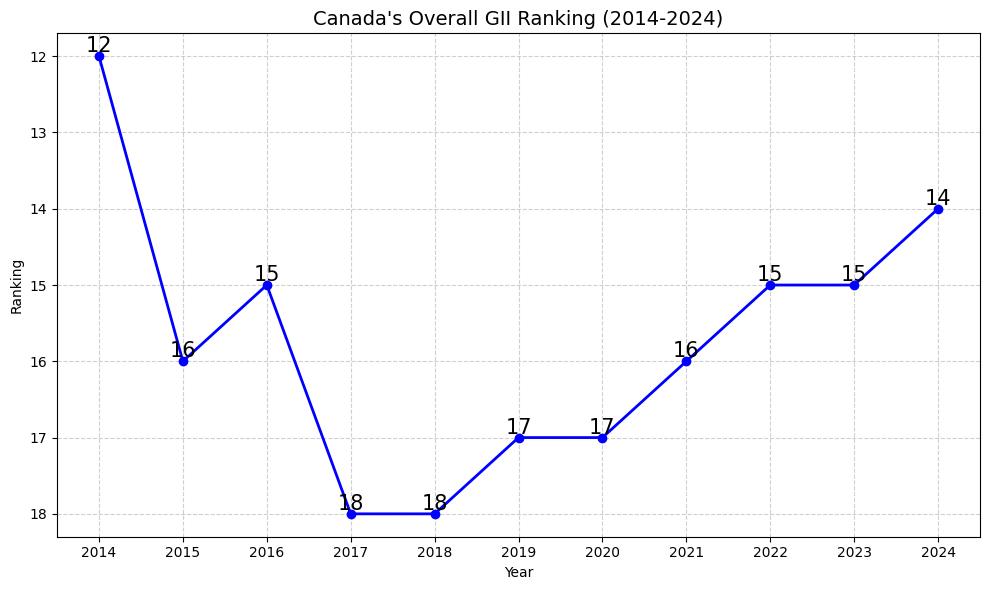

In [15]:
import matplotlib.pyplot as plt
# Plotting the overall GII ranking trend
plt.figure(figsize=(10, 6))
plt.plot(canada_ranks_df_2014_to_2024["Year"], canada_ranks_df_2014_to_2024["GII Overall"], marker='o', linestyle='-', linewidth=2, color='blue')

# Invert y-axis since lower rank is better
plt.gca().invert_yaxis()

# Labels and title
plt.title("Canada's Overall GII Ranking (2014-2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.xticks(canada_ranks_df_2014_to_2024["Year"])
plt.grid(True, linestyle="--", alpha=0.6)

# Annotate each point with its value
for x, y in zip(canada_ranks_df_2014_to_2024["Year"], canada_ranks_df_2014_to_2024["GII Overall"]):
    plt.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=15)

plt.tight_layout()
plt.show()

Canada's overall GII ranking fluctuated around 14-18, relatively consistent.After a brief decline to 18th place in 2017–2018, it gradually improved to 14th in 2024, reflecting resilience and recovery in innovation performance after the pandemic period.

***Past ten year ranking by pillar***


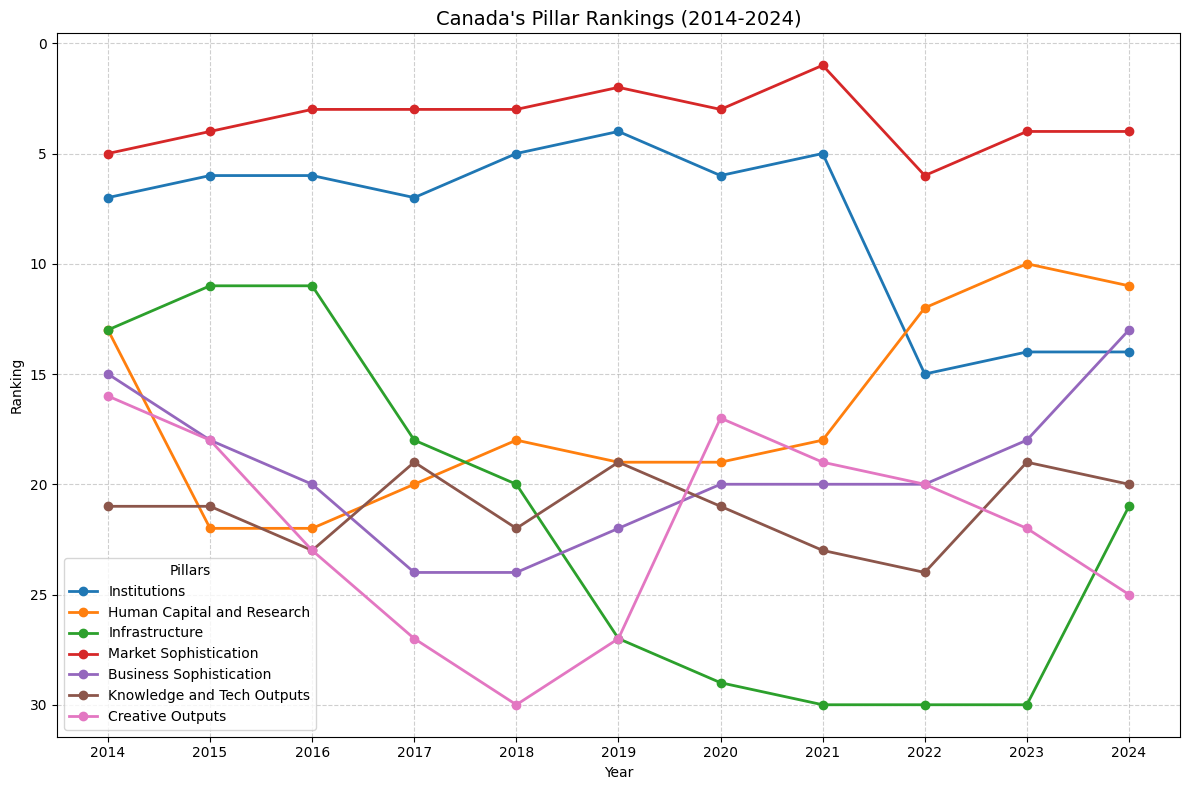

In [16]:
pillar_columns = [
    "Institutions",
		"Human Capital and Research",
		"Infrastructure",
		"Market Sophistication",
		"Business Sophistication",
		"Knowledge and Tech Outputs",
		"Creative Outputs"
]
# Plotting the pillar ranking trends
plt.figure(figsize=(12, 8))
for pillar in pillar_columns:
		plt.plot(canada_ranks_df_2014_to_2024["Year"], canada_ranks_df_2014_to_2024[pillar], marker='o', linestyle='-', linewidth=2, label=pillar)

# Invert y-axis since lower rank is better
plt.gca().invert_yaxis()
# Labels and title
plt.title("Canada's Pillar Rankings (2014-2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.xticks(canada_ranks_df_2014_to_2024["Year"])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Pillars", loc='lower left')
plt.tight_layout()
plt.show()

We can find Market Sophistication has been Canada's strongest pillar, maintaining top 5 positions and even reaching number 1 in 2021.

Human Capital & Research improved notably in recent years, advancing from 22nd in 2015 to 9th in 2024, signaling growing strength in education and research systems.

While many factors remain at a consistent level, there exists abnormal decline trend in institutions and infrastructure in recent years.

###GII Canada 2024: Comparative Analysis

###Data Cleaning

In [17]:
#Step 1: reformat the dataset and put the two target variables at the end
import pandas as pd
df_2024 = pd.read_excel("datasets/wipo-pub-2000-2024-tech1.xlsx", sheet_name="Data")
df_valid = df_2024[df_2024["SCORE"].notnull()]#Ensure the target variables not null
df_pivot = df_valid.pivot_table(
    index="ECONOMY_NAME",
    columns="NAME",
    values="SCORE"
).reset_index()
df_pivot = df_pivot.rename(columns={"Global Innovation Index": "GII_Overall_Score"})
# "Innovation Inputs" and "Innovation Outputs" are composite scores derived from input/output pillars.
# Including them would cause information leakage since they are direct contributors to the target variable.
df_pivot = df_pivot.drop(columns=["Innovation inputs", "Innovation outputs"], errors="ignore")
df_rank = df_2024[df_2024["NAME"] == "Global Innovation Index"][["ECONOMY_NAME", "RANK"]].dropna()
df_rank = df_rank.rename(columns={"RANK": "GII_Overall_Rank"})
df_merged = df_pivot.merge(df_rank, on="ECONOMY_NAME", how="left")
df_meta = pd.read_excel("datasets/wipo-pub-2000-2024-tech1.xlsx", sheet_name="Economies")
df_meta = df_meta[["ECONOMY_NAME", "INCOME", "REG_UN", "POP", "PPPGDP", "PPPPC"]]
df_full = df_merged.merge(df_meta, on="ECONOMY_NAME", how="left")
meta_cols = ["ECONOMY_NAME", "INCOME", "REG_UN", "POP", "PPPGDP", "PPPPC"]
score_col = "GII_Overall_Score"
rank_col = "GII_Overall_Rank"
feature_cols = [col for col in df_full.columns if col not in meta_cols + [score_col, rank_col]]
df_final = df_full[meta_cols + feature_cols + [score_col, rank_col]]
df_final.to_csv("GII2024_ML_with_Metadata.csv", index=False)
df_final.head()


,ECONOMY_NAME,INCOME,REG_UN,POP,PPPGDP,PPPPC,"Applied tariff rate, weighted avg., %",Business environment,Business sophistication,Citable documents H-index,...,"Trade, diversification and market scale",Trademarks by origin/bn PPP$ GDP,"Unicorn valuation, % GDP",University–industry R&D collaboration†,Utility models by origin/bn PPP$ GDP,"VC received, value, % GDP","VC recipients, deals/bn PPP$ GDP","Venture capital (VC) investors, deals/bn PPP$ GDP",GII_Overall_Score,GII_Overall_Rank
0,Albania,UM,Europe,2811.65,55.928,19566.01,92.210521,53.239174,26.848755,2.978723,...,61.365225,19.538857,0.000000,59.694859,0.590961,0.367975,5.472364,NaN,24.537930,84.0
1,Algeria,LM,Northern Africa and Western Asia,46164.22,628.990,13681.62,0.000000,48.968077,17.963561,10.159574,...,8.848298,14.238961,0.000000,54.663444,NaN,4.751620,0.276453,NaN,16.162259,115.0
2,Angola,LM,Sub-Saharan Africa,36749.91,260.323,7077.30,43.866376,20.964731,6.810525,0.851064,...,16.304200,8.167782,0.000000,0.639246,1.106400,NaN,NaN,NaN,10.216209,133.0
3,Argentina,UM,Latin America and the Caribbean,45538.40,1239.520,26506.09,54.224936,1.052496,27.725225,27.659574,...,53.343307,44.241083,7.863705,37.021758,4.290896,5.431742,4.196656,1.607256,26.424646,76.0
4,Armenia,UM,Northern Africa and Western Asia,2943.38,58.497,19744.71,71.139047,46.359244,22.701065,9.946809,...,48.069976,80.880401,0.000000,25.738732,47.278535,0.511027,16.983590,2.591861,29.018772,63.0


In [18]:
#Step 2: deal with missing values
df = pd.read_csv("GII2024_ML_with_Metadata.csv")
print('Count missing values:')
missing_counts = df.isnull().sum()
print(missing_counts)
print(50*'-')

# Drop columns with too much missingness (>50%)
threshold = 0.5 * len(df)
high_missing_cols = missing_counts[missing_counts > threshold].index.tolist()
dropped_count = len(high_missing_cols)
df_cleaned = df.drop(columns=high_missing_cols)

print(f"New dataset shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
print(f"Total columns dropped due to >50% missing: {dropped_count}")
print("Dropped columns:")
for i, col in enumerate(high_missing_cols[:10], 1):
    print(f"{i}. {col}")
print(50*'-')

# Fill remaining missing values with median (<50%)
df_filled = df_cleaned.fillna(df_cleaned.median(numeric_only=True))

# Check that no missing values remain
remaining_na = df_filled.isnull().sum().sum()
print(f"Remaining missing values: {remaining_na}")

Count missing values:
ECONOMY_NAME                                          0
INCOME                                                0
REG_UN                                                0
POP                                                   0
PPPGDP                                                2
                                                     ..
VC received, value, % GDP                            25
VC recipients, deals/bn PPP$ GDP                     24
Venture capital (VC) investors, deals/bn PPP$ GDP    31
GII_Overall_Score                                     0
GII_Overall_Rank                                      0
Length: 114, dtype: int64
--------------------------------------------------
New dataset shape: 133 rows × 112 columns
Total columns dropped due to >50% missing: 2
Dropped columns:
1. Entertainment and media market/th pop. 15–69
2. Loans from microfinance institutions, % GDP
--------------------------------------------------
Remaining missing values: 0


In [19]:
#Apply one-hot encoding to non-numerical features
df_encoded = pd.get_dummies(df_filled, columns=["INCOME", "REG_UN"], drop_first=True)
target_cols = ["GII_Overall_Score", "GII_Overall_Rank"]
non_target_cols = [col for col in df_encoded.columns if col not in target_cols]
df_encoded = df_encoded[non_target_cols + target_cols]
df_encoded.shape, df_encoded.head(3)
df_encoded.to_csv("GII2024_Cleaned.csv", index=False)

###Exploratory Data Analysis

***Heat map***


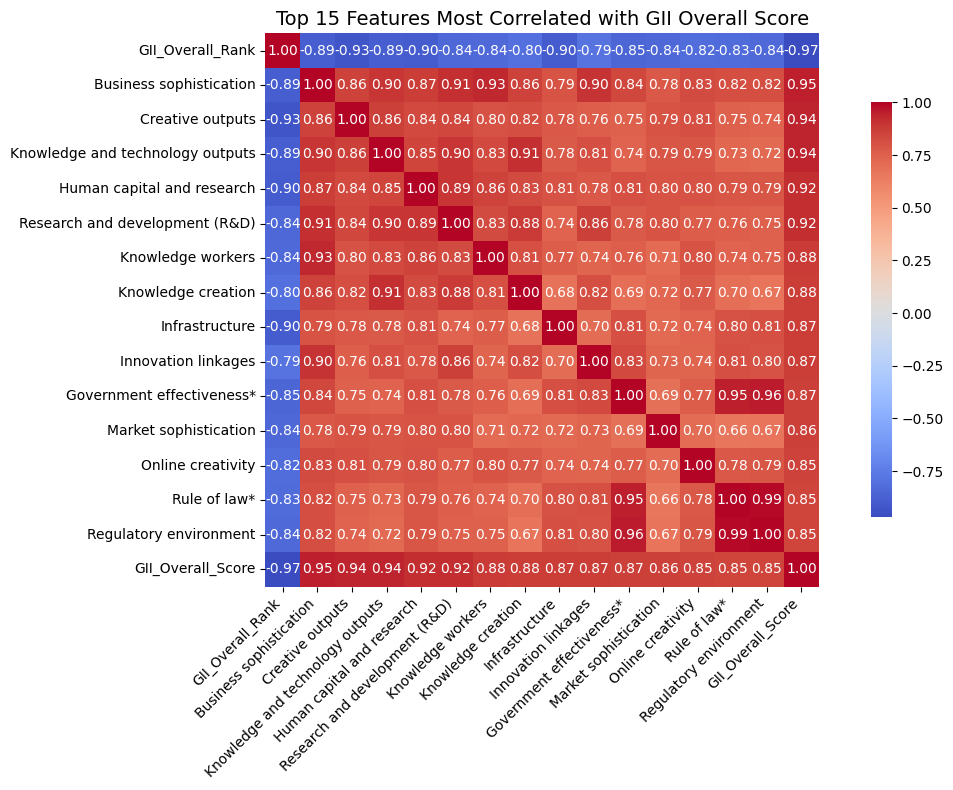

In [20]:
#Plot Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
correlations = df_encoded.corr(numeric_only=True)["GII_Overall_Score"].drop("GII_Overall_Score")
top_corr_features = correlations.abs().sort_values(ascending=False).head(15).index
corr_data = df_encoded[top_corr_features.tolist() + ["GII_Overall_Score"]]
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})
plt.title("Top 15 Features Most Correlated with GII Overall Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can find a very high negative correlation between GII_OverallScore and GII_OverallRanking, which is -0.97.
That means these two variables are nearly perfectly negatively correlated, because the rank is directly derived from the score. Including both in modeling would lead to redundancy and potential information leakage.

To avoid this, we retain only `GII_Overall_Score` as the primary target for regression analysis, and drop `GII_Overall_Rank`.

This simplifies the modeling process and focuses on predicting a more informative, continuous measure of innovation performance.


In [21]:
df = pd.read_csv("GII2024_Cleaned.csv")
df = df.drop(columns=["GII_Overall_Rank"], errors="ignore")
df.to_csv("GII2024_Cleaned_ScoreOnly.csv", index=False)
df.shape

(133, 118)

***Split data into training and test sets***


In [22]:
df_filled = pd.read_csv("GII2024_Cleaned_ScoreOnly.csv")
X = df_filled.drop(columns=["ECONOMY_NAME", "GII_Overall_Score"], errors="ignore")
y = df_filled["GII_Overall_Score"]
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Output shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106, 116), (27, 116), (106,), (27,))

***Split data into training and test sets***


***Random forest and top 15 factors driving innovation***


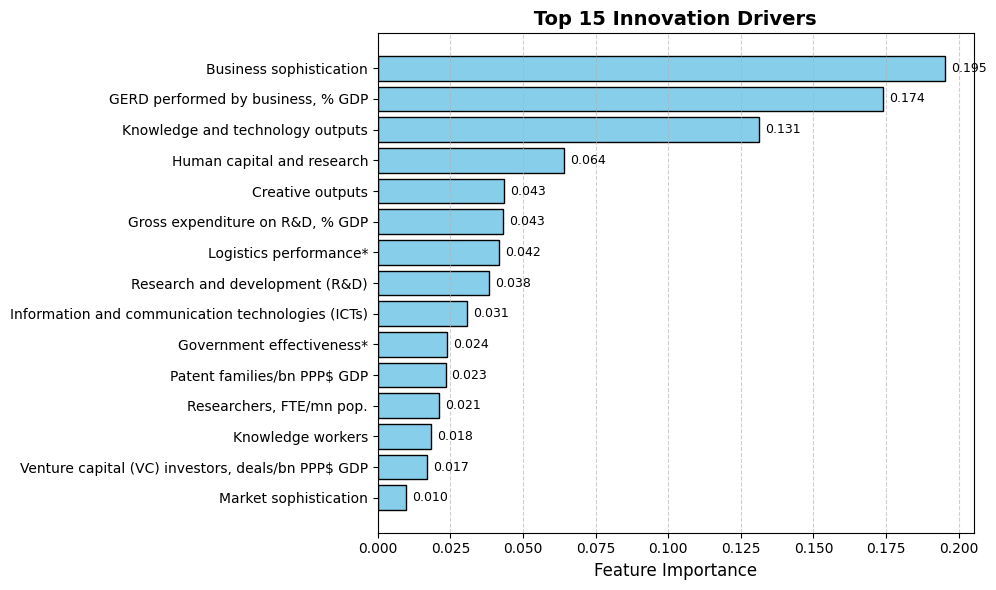

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1][:15]  # Top 15

plt.figure(figsize=(10, 6))
bars = plt.barh(
    range(15),
    importances[indices][::-1],
    color='skyblue',
    edgecolor='black'
)
plt.yticks(range(15), [feature_names[i] for i in indices][::-1], fontsize=10)
plt.xlabel("Feature Importance", fontsize=12)
plt.title(" Top 15 Innovation Drivers ", fontsize=14, weight='bold')

# Annotate bars with values
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2,
             f"{width:.3f}", va='center', fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Save top feature names for next step
top_features = [feature_names[i] for i in indices]

***Canada vs Top 10 Countries on Top 15 Innovation Drivers***


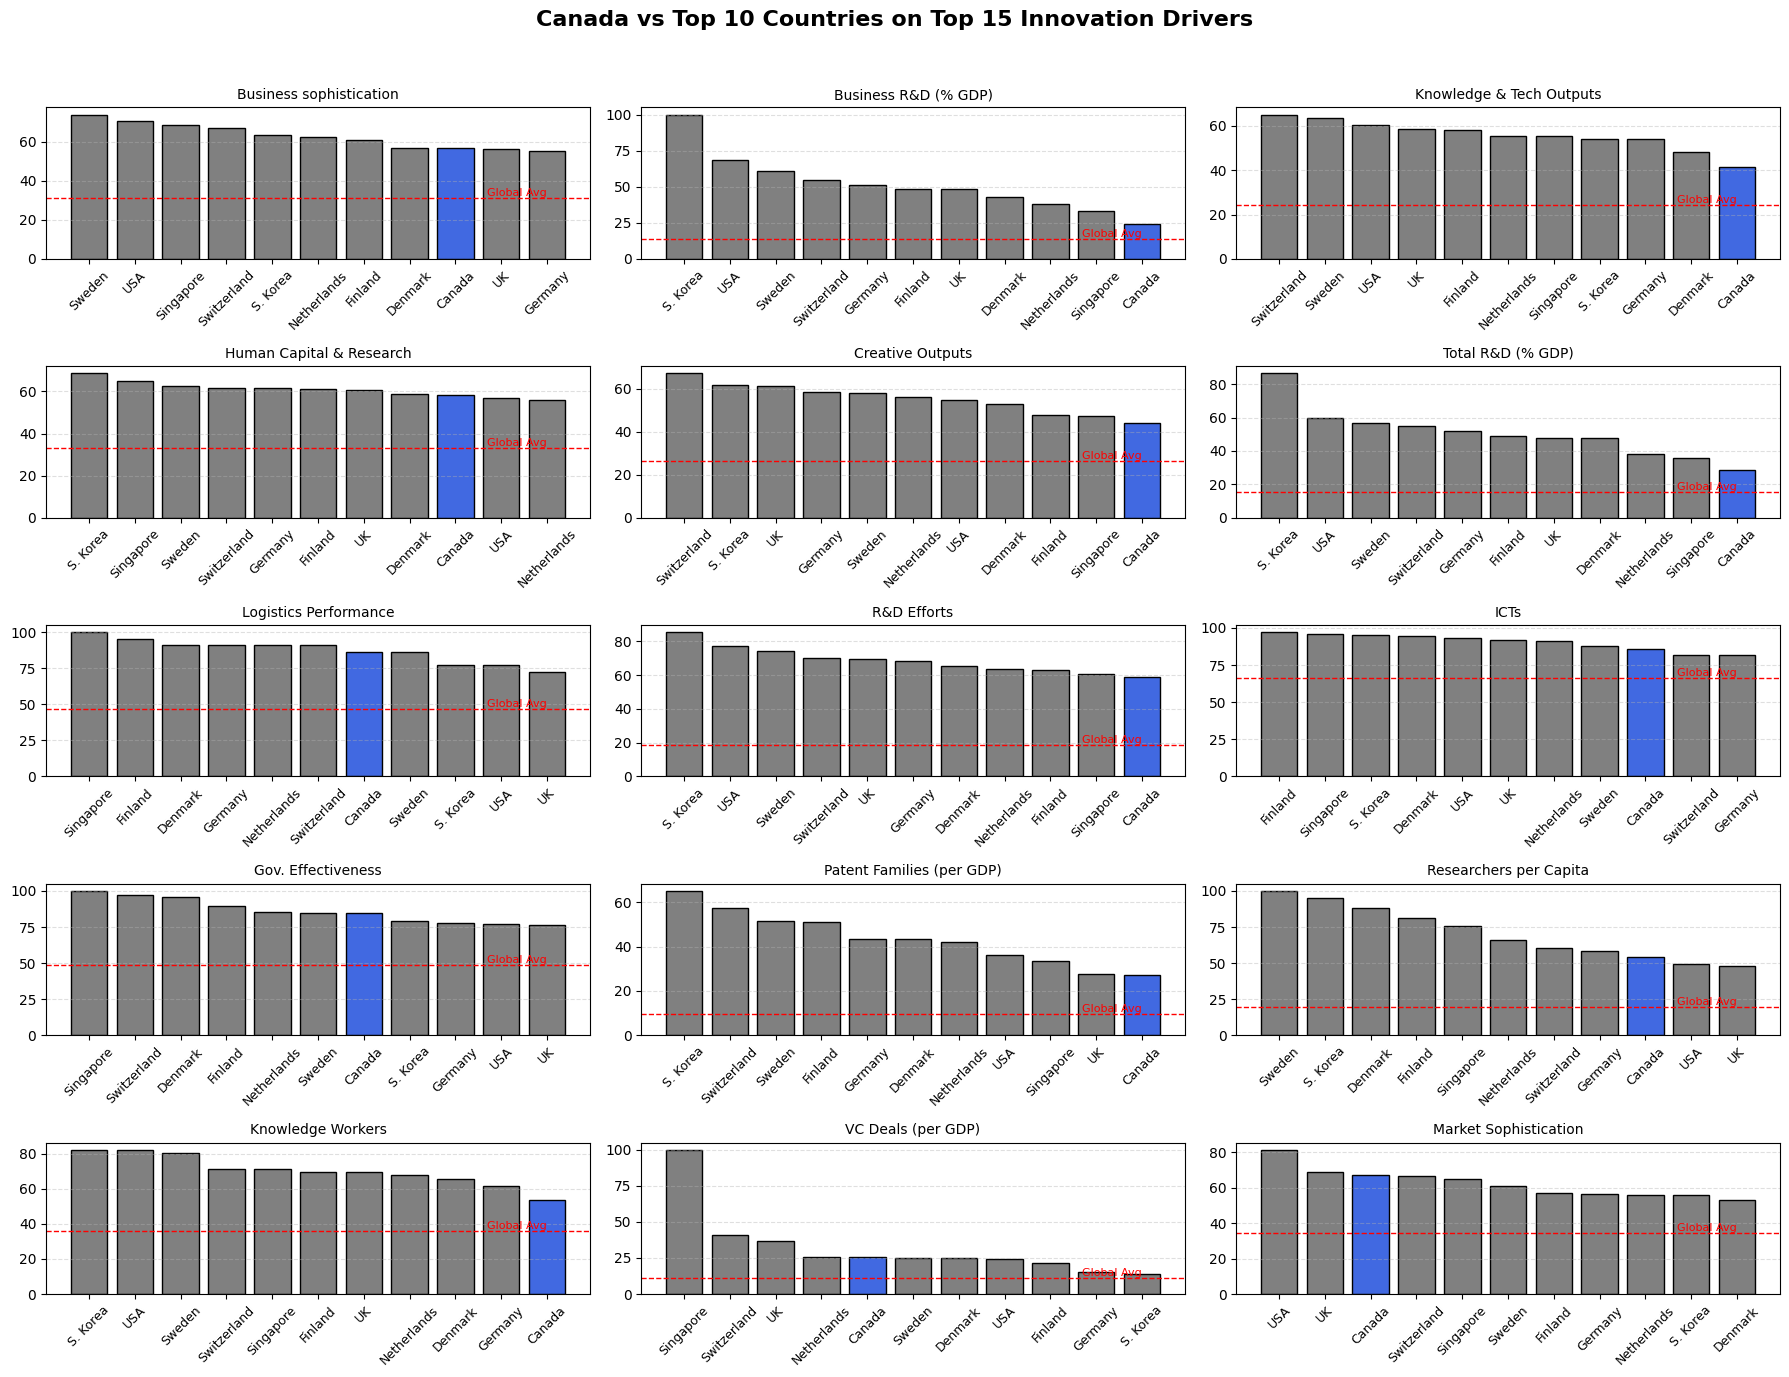

In [24]:
df_filled = pd.read_csv("GII2024_Cleaned_ScoreOnly.csv")

# Top features and short names as defined earlier
top_features = [
    'Business sophistication',
    'GERD performed by business, % GDP',
    'Knowledge and technology outputs',
    'Human capital and research',
    'Creative outputs',
    'Gross expenditure on R&D, % GDP',
    'Logistics performance*',
    'Research and development (R&D)',
    'Information and communication technologies (ICTs)',
    'Government effectiveness*',
    'Patent families/bn PPP$ GDP',
    'Researchers, FTE/mn pop.',
    'Knowledge workers',
    'Venture capital (VC) investors, deals/bn PPP$ GDP',
    'Market sophistication'
]

feature_name_map = {
    'Business sophistication': 'Business sophistication',
    'GERD performed by business, % GDP': 'Business R&D (% GDP)',
    'Knowledge and technology outputs': 'Knowledge & Tech Outputs',
    'Human capital and research': 'Human Capital & Research',
    'Creative outputs': 'Creative Outputs',
    'Gross expenditure on R&D, % GDP': 'Total R&D (% GDP)',
    'Logistics performance*': 'Logistics Performance',
    'Research and development (R&D)': 'R&D Efforts',
    'Information and communication technologies (ICTs)': 'ICTs',
    'Government effectiveness*': 'Gov. Effectiveness',
    'Patent families/bn PPP$ GDP': 'Patent Families (per GDP)',
    'Researchers, FTE/mn pop.': 'Researchers per Capita',
    'Knowledge workers': 'Knowledge Workers',
    'Venture capital (VC) investors, deals/bn PPP$ GDP': 'VC Deals (per GDP)',
    'Market sophistication': 'Market Sophistication'
}

def simplify_country_name(name):
    replacements = {
        "United States of America": "USA",
        "Republic of Korea": "S. Korea",
        "United Kingdom": "UK",
        "Hong Kong, China (SAR)": "Hong Kong",
        "Czech Republic": "Czechia",
        "United Arab Emirates": "UAE",
        "Netherlands (Kingdom of the)": "Netherlands"
    }
    return replacements.get(name, name)

# Filter top 10 countries + Canada
top10_countries = df_filled.sort_values("GII_Overall_Score", ascending=False).head(10)["ECONOMY_NAME"].tolist()
selected_countries = top10_countries + ["Canada"]
df_top10_canada = df_filled[df_filled["ECONOMY_NAME"].isin(selected_countries)].copy()
df_top10_canada["Short_Name"] = df_top10_canada["ECONOMY_NAME"].apply(simplify_country_name)

# Plot with global average line
fig, axes = plt.subplots(5, 3, figsize=(18, 14))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    data = df_top10_canada[["Short_Name", feature]].sort_values(by=feature, ascending=False)
    global_avg = df_filled[feature].mean()

    ax.bar(
        data["Short_Name"], data[feature],
        color=["royalblue" if c == "Canada" else "gray" for c in data["Short_Name"]],
        edgecolor='black'
    )

    # Draw global average line
    ax.axhline(global_avg, color='red', linestyle='--', linewidth=1)
    ax.text(len(data["Short_Name"]) - 1, global_avg, 'Global Avg', va='bottom', ha='right', color='red', fontsize=8)

    title = feature_name_map.get(feature, feature)
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.suptitle("Canada vs Top 10 Countries on Top 15 Innovation Drivers", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Canada_vs_Top10_Top15Factors.png", dpi=300)
plt.show()


While Canada consistently performs above the global average across all top innovation drivers, a comparison with the top 10 most innovative countries reveals a more nuanced picture.  

**Strengths:**  
1. **Human Capital, Research and Education Related Factors**：<br>
Among the global leading countries, Canada does very well in Human Capital & Research, R&D Efforts, Researchers per Capita and Knowledge Workers.

2. **Infrastructure**：<br>
Canada do well in Logistics Performance, Information and Communication Technologies(ICT) and Market Sophistication of supportive financial system
<br>
3. **Institutional & Innovation Ecosystem**：<br>
Canada benefits from an effective government and a supportive innovation ecosystem. Business Sophistication captures the capacity of firms to absorb knowledge, invest in innovation, and engage in global collaboration. Canada's strong performance in this area highlights the ability of its private sector to support and apply innovation, even though total financial investment in R&D remains limited.
<br>

**Weaknesses:**  
1. **Innovation Investment & Capital Market**：<br>
Canada lags in financial investment in innovation. Both total and business R&D expenditures as a share of GDP are relatively low, and venture capital activity—measured by VC deals per GDP—also falls behind leading innovation economies

2. **Innovation Outputs & Commercialization**：<br>
 Canada underperforms in converting research into patents and high-tech outcomes, and also lags behind in cultural and creative exports. This suggests a gap in turning innovation efforts into globalized, marketable outputs.


***Z-Score Bar Chart***


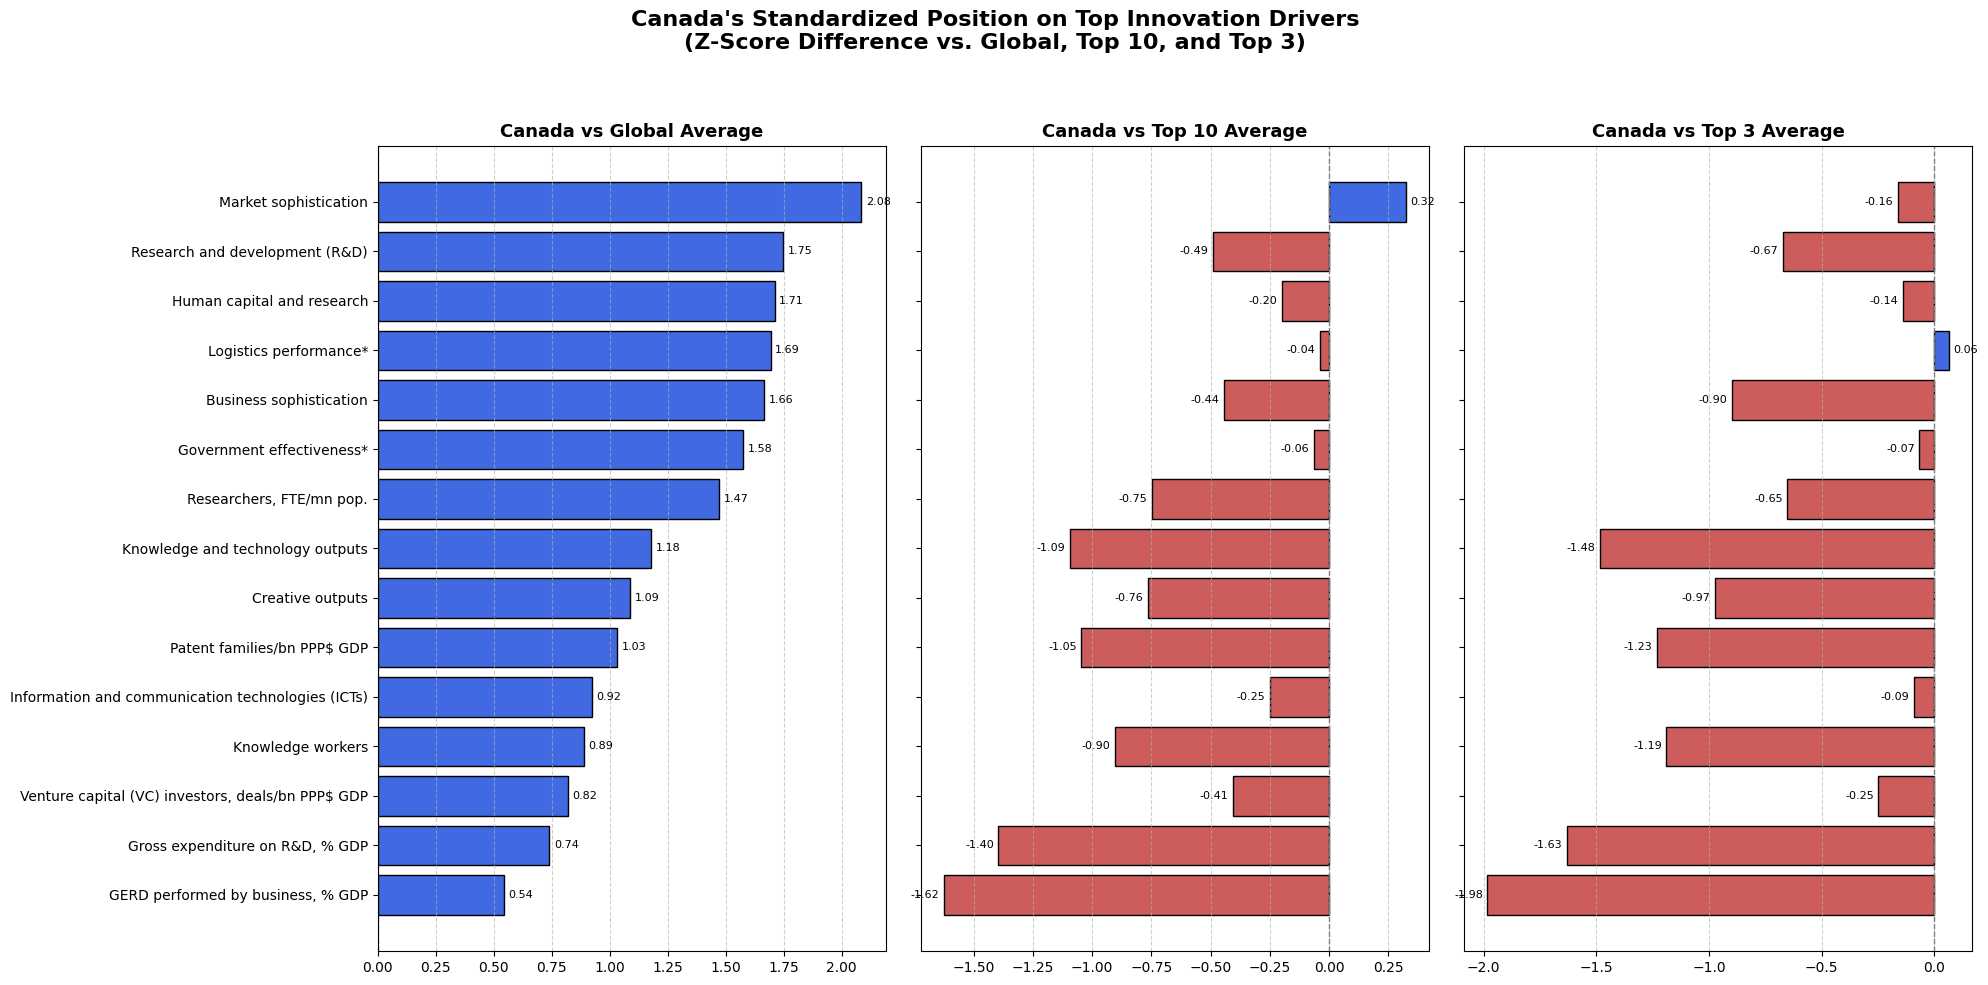

In [25]:
# Prepare data for three Z-score difference plots
from scipy.stats import zscore

# Z-scores
z_scores = df_filled[top_features].apply(zscore)
canada_z = z_scores[df_filled["ECONOMY_NAME"] == "Canada"].iloc[0]
global_avg_z = z_scores.mean()
top10_avg_z = z_scores[df_filled["ECONOMY_NAME"].isin(
    df_filled.sort_values("GII_Overall_Score", ascending=False).head(10)["ECONOMY_NAME"]
)].mean()
top3_avg_z = z_scores[df_filled["ECONOMY_NAME"].isin(
    df_filled.sort_values("GII_Overall_Score", ascending=False).head(3)["ECONOMY_NAME"]
)].mean()

# Differences
z_diff_global = (canada_z - global_avg_z).sort_values()
z_diff_top10 = (canada_z - top10_avg_z).sort_values()
z_diff_top3 = (canada_z - top3_avg_z).sort_values()

# Plot all 3 subplots in one figure
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

titles = [
    "Canada vs Global Average",
    "Canada vs Top 10 Average",
    "Canada vs Top 3 Average"
]
diffs = [z_diff_global, z_diff_top10, z_diff_top3]

for ax, diff, title in zip(axes, diffs, titles):
    bars = ax.barh(diff.index, diff.values,
                   color=["royalblue" if val > 0 else "indianred" for val in diff.values],
                   edgecolor='black')
    ax.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(title, fontsize=13, weight='bold')
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02 * np.sign(width), bar.get_y() + bar.get_height()/2,
                f"{width:.2f}", va='center', ha='left' if width > 0 else 'right', fontsize=8)

fig.suptitle("Canada's Standardized Position on Top Innovation Drivers\n(Z-Score Difference vs. Global, Top 10, and Top 3)", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


The Z-score analysis offers a more precise, standardized measurement of Canada's innovation performance relative to other countries.

**Strengths:**  
<br>
Compared to the global average, Canada performs exceptionally well across multiple innovation drivers — scoring between 0.54 and 2.08 standard deviations above the mean. Notably, Market Sophistication stands out: even when compared to the Top 10 innovation economies, Canada still scores 0.32 standard deviations higher, indicating a strong market environment characterized by scale, openness, and accessible financing for innovative firms.

Canada also excels in education related factors like Human Capital & Research and R&D infrastructure, with both areas exceeding the global average by more than 1.7 standard deviations. Furthermore, Logistics Performance is another standout: Canada slightly outperforms even the Top 3 innovation leaders, reflecting a highly efficient infrastructure for innovation flows.

<br>


**Weaknesses:**  
<br>
Despite these strengths, Canada significantly underperforms in Innovation Investment & Capital Market indicators. While marginally above the global average (~0.5 SD), both Total R&D Expenditure and Business-performed R&D (% GDP) trail far behind top innovation economies. The latter lags almost 2 standard deviations below the Top 3 average, suggesting a substantial investment gap.

In addition, Innovation Outputs & Commercialization represent a major weakness. Metrics like Knowledge & Technology Outputs, Creative Outputs, and Patent Families per GDP are only slightly above the global average, but fall sharply when benchmarked against top performers. For instance, Canada's score on Knowledge & Tech Outputs is nearly 1.5 standard deviations below the Top 3 average — indicating challenges in translating research and innovation inputs into impactful outcomes.

***Radar Chart***


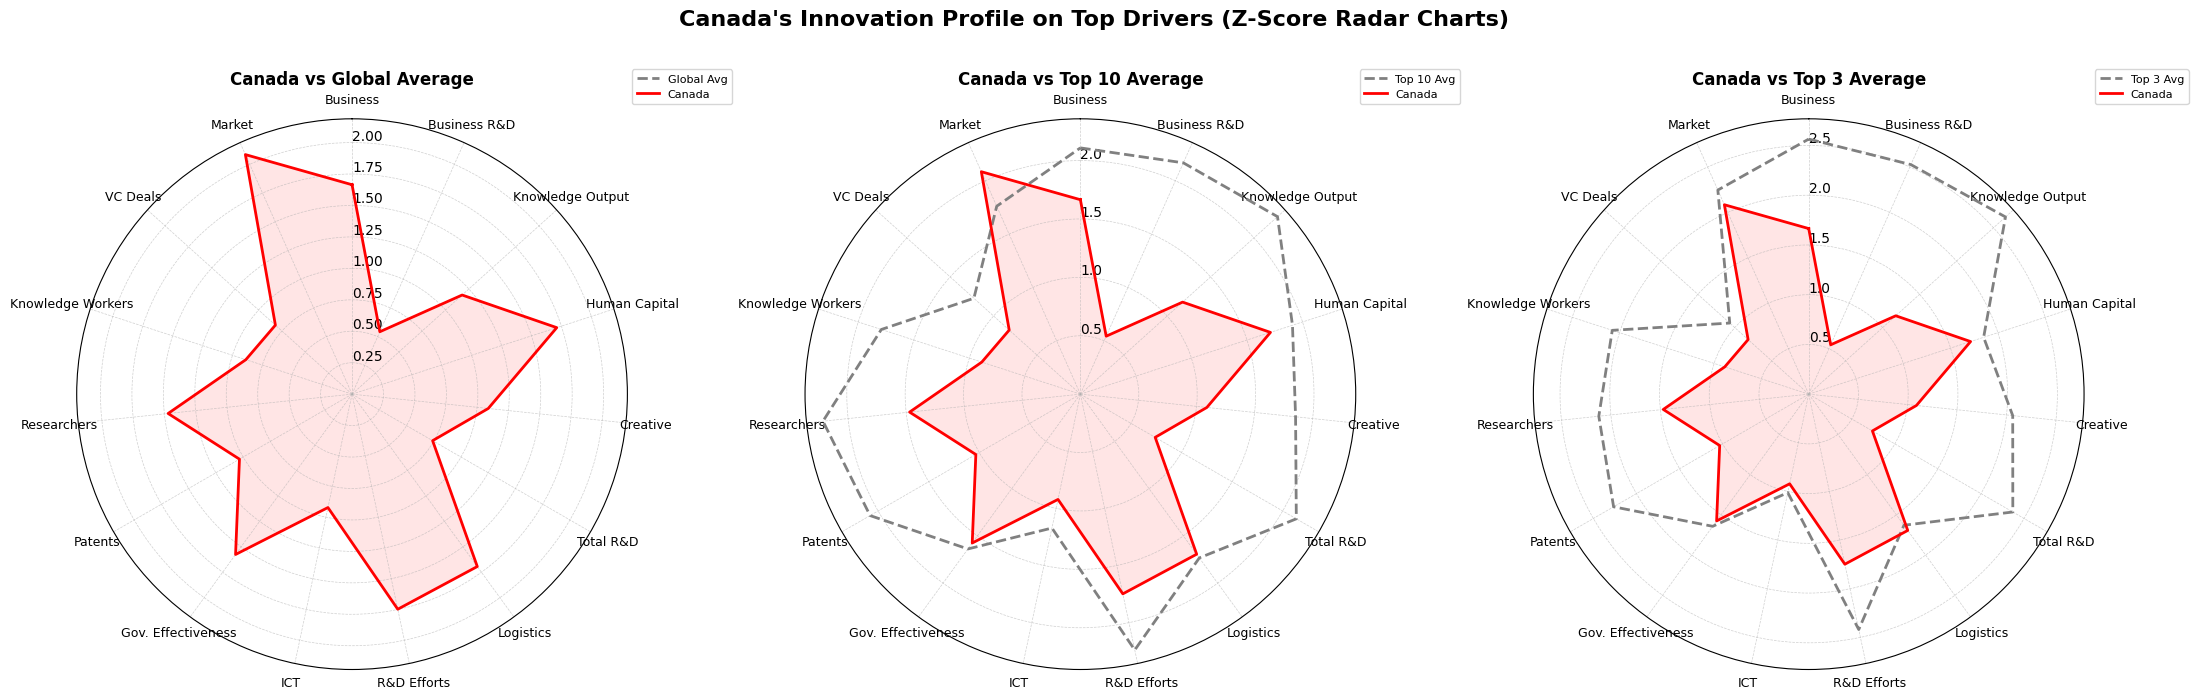

In [26]:
from math import pi
from scipy.stats import zscore
df_filled = pd.read_csv("GII2024_Cleaned_ScoreOnly.csv")

# Define top features
top_features = [
    'Business sophistication',
    'GERD performed by business, % GDP',
    'Knowledge and technology outputs',
    'Human capital and research',
    'Creative outputs',
    'Gross expenditure on R&D, % GDP',
    'Logistics performance*',
    'Research and development (R&D)',
    'Information and communication technologies (ICTs)',
    'Government effectiveness*',
    'Patent families/bn PPP$ GDP',
    'Researchers, FTE/mn pop.',
    'Knowledge workers',
    'Venture capital (VC) investors, deals/bn PPP$ GDP',
    'Market sophistication'
]

# Simplify labels
feature_name_map = {
    'Business sophistication': 'Business',
    'GERD performed by business, % GDP': 'Business R&D',
    'Knowledge and technology outputs': 'Knowledge Output',
    'Human capital and research': 'Human Capital',
    'Creative outputs': 'Creative',
    'Gross expenditure on R&D, % GDP': 'Total R&D',
    'Logistics performance*': 'Logistics',
    'Research and development (R&D)': 'R&D Efforts',
    'Information and communication technologies (ICTs)': 'ICT',
    'Government effectiveness*': 'Gov. Effectiveness',
    'Patent families/bn PPP$ GDP': 'Patents',
    'Researchers, FTE/mn pop.': 'Researchers',
    'Knowledge workers': 'Knowledge Workers',
    'Venture capital (VC) investors, deals/bn PPP$ GDP': 'VC Deals',
    'Market sophistication': 'Market'
}
categories_short = [feature_name_map[f] for f in top_features]
N = len(categories_short)

# Z-score
z_scores = df_filled[top_features].apply(zscore)
canada_z = z_scores[df_filled["ECONOMY_NAME"] == "Canada"].iloc[0]
global_avg_z = z_scores.mean()
top10_avg_z = z_scores[df_filled["ECONOMY_NAME"].isin(
    df_filled.sort_values("GII_Overall_Score", ascending=False).head(10)["ECONOMY_NAME"]
)].mean()
top3_avg_z = z_scores[df_filled["ECONOMY_NAME"].isin(
    df_filled.sort_values("GII_Overall_Score", ascending=False).head(3)["ECONOMY_NAME"]
)].mean()

# Angles for radar
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Function to plot radar chart
def plot_radar(ax, title, reference, label):
    ref_values = reference.tolist() + [reference.tolist()[0]]
    can_values = canada_z.tolist() + [canada_z.tolist()[0]]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories_short, fontsize=9)
    ax.set_rlabel_position(0)
    ax.plot(angles, ref_values, linestyle='--', linewidth=2, label=label, color='gray')
    ax.plot(angles, can_values, linewidth=2, label='Canada', color='red')
    ax.fill(angles, can_values, color='red', alpha=0.1)
    ax.set_title(title, size=12, weight='bold', position=(0.5, 1.1))
    ax.legend(loc='upper right', fontsize=8, bbox_to_anchor=(1.2, 1.1))
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Plot all three radar charts
fig, axs = plt.subplots(1, 3, subplot_kw=dict(polar=True), figsize=(22, 7))
plot_radar(axs[0], "Canada vs Global Average", global_avg_z, "Global Avg")
plot_radar(axs[1], "Canada vs Top 10 Average", top10_avg_z, "Top 10 Avg")
plot_radar(axs[2], "Canada vs Top 3 Average", top3_avg_z, "Top 3 Avg")

fig.suptitle("Canada's Innovation Profile on Top Drivers (Z-Score Radar Charts)", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


The radar charts offer a more intuitive visual representation of the Z-score bar charts. They highlight Canada's relative strengths and weaknesses across key innovation drivers compared to the global average, top 10, and top 3 innovation countries.

#What Other Official Rankings Say?

**Bloomberg Innovation Index**

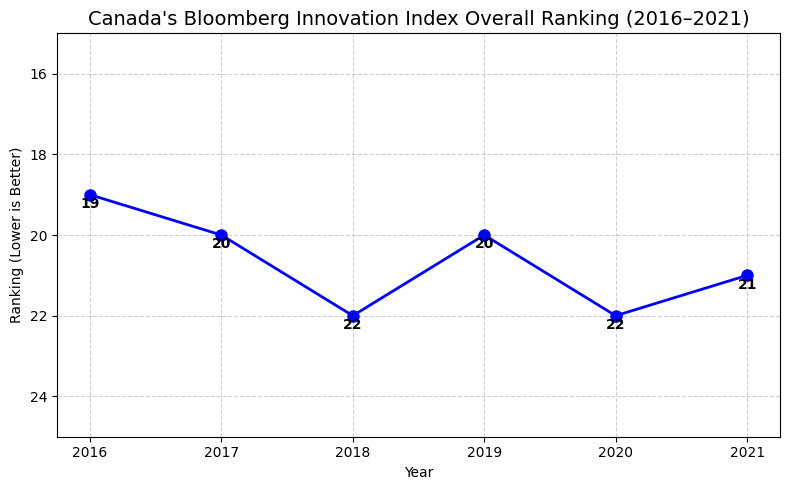

In [27]:
df_bloomberg = pd.read_csv("datasets/Bloomberg_Canada_2016_2021.csv")

# Sort by year just in case
df_bloomberg = df_bloomberg.sort_values("Year")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(
    df_bloomberg["Year"],
    df_bloomberg["Overall Rank"],
    marker='o',
    markersize=8,
    markerfacecolor='blue',
    linestyle='-',
    color='blue',
    linewidth=2
)
plt.title("Canada's Bloomberg Innovation Index Overall Ranking (2016–2021)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Ranking (Lower is Better)")
plt.gca().invert_yaxis()  # Lower rank is better
plt.ylim(25, 15)  # Focused range to emphasize stability

# Annotate each point with rank
for i, value in enumerate(df_bloomberg["Overall Rank"]):
    plt.text(
        df_bloomberg["Year"].iloc[i],
        value + 0.4,
        str(value),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Blooomberg Innovation Idex shows Canada's innivation ranking is stable around 20th in the world from 2016 to 2021, very similar to the GII.

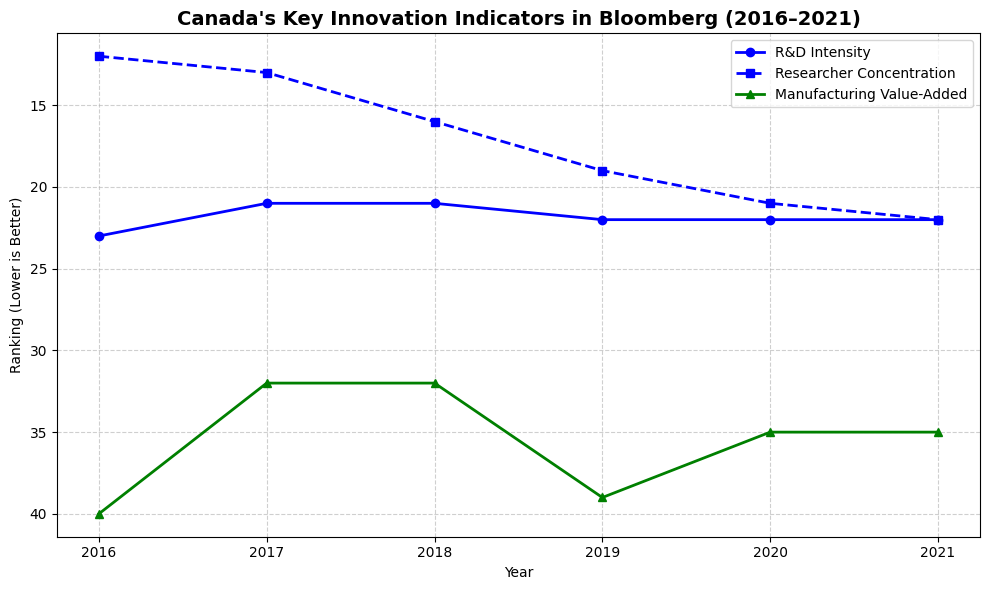

In [28]:
file_path = "datasets/Bloomberg_Canada_2016_2021.csv"
df = pd.read_csv(file_path)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Ensure 'Year' column is treated properly
df = df.sort_values("Year")

# Plotting the indicators
plt.figure(figsize=(10, 6))

# R&D Intensity and Researcher Concentration (same color)
plt.plot(df["Year"], df["R&D Intensity"], marker='o', label="R&D Intensity", color='blue', linewidth=2)
plt.plot(df["Year"], df["Researcher Concentration"], marker='s', label="Researcher Concentration", color='blue', linestyle='--', linewidth=2)

# Manufacturing Value-Added (different color)
plt.plot(df["Year"], df["Manufacturing Value-Added"], marker='^', label="Manufacturing Value-Added", color='green', linewidth=2)

# Formatting
plt.title("Canada's Key Innovation Indicators in Bloomberg (2016–2021)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Ranking (Lower is Better)")
plt.gca().invert_yaxis()  # Lower rank is better
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


The Bloomberg Innovation Index supports the findings from the GII: Canada performs very well in innovation pillars related to R&D, research, and education. However, it ranks poorly in manufacturing value-added — around 40th in the world — highlighting Canada's weakness in innovation outputs and commercialization.

**OECD Data**

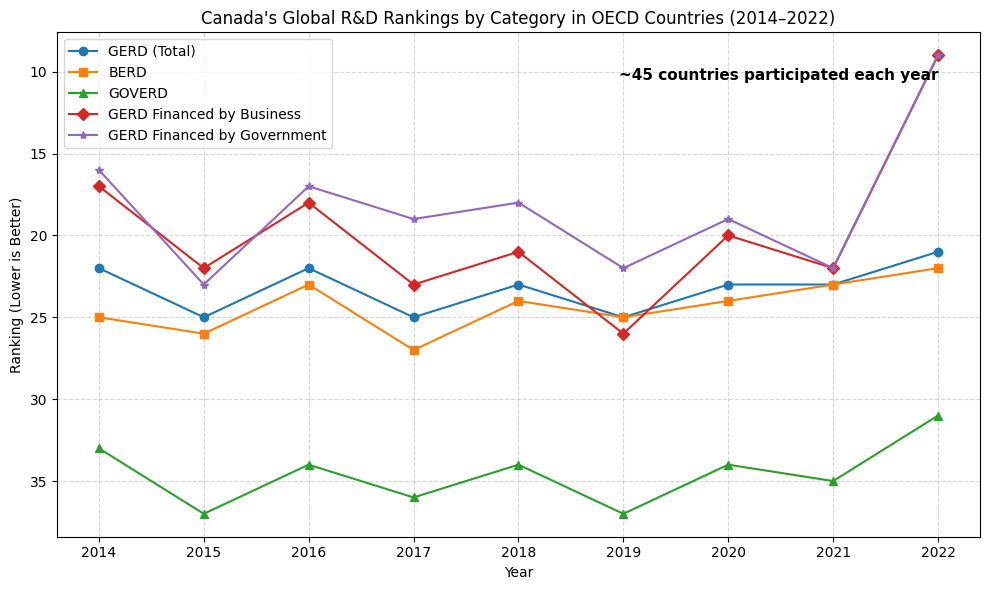

In [29]:
#Clean and compile OECD Data of different variables
file_path = "datasets/OECD.STI.STP,DSD_MSTI@DF_MSTI,+.A.G.PT_B1GQ...csv"
df = pd.read_csv(file_path)
df_clean = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].dropna()
df_clean["OBS_VALUE"] = pd.to_numeric(df_clean["OBS_VALUE"], errors="coerce")
df_clean = df_clean.dropna()
df_clean = df_clean[df_clean["TIME_PERIOD"] != 2023]
df_clean["Rank"] = df_clean.groupby("TIME_PERIOD")["OBS_VALUE"].rank(ascending=False, method="min")
canada_gerd_rank = df_clean[df_clean["Reference area"] == "Canada"][["TIME_PERIOD", "OBS_VALUE", "Rank"]].rename(
    columns={
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "GERD (% GDP)",
        "Rank": "Canada GERD Rank"
    }
).reset_index(drop=True)

canada_gerd_rank.to_csv("Canada_GERD_Ranking_No_2023.csv", index=False)
file_path_berd = "datasets/OECD.STI.STP,DSD_MSTI@DF_MSTI,+.A.B.PT_B1GQ...csv"
df_berd = pd.read_csv(file_path_berd)
df_berd_clean = df_berd[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].dropna()
df_berd_clean["OBS_VALUE"] = pd.to_numeric(df_berd_clean["OBS_VALUE"], errors="coerce")
df_berd_clean = df_berd_clean.dropna()
df_berd_clean = df_berd_clean[df_berd_clean["TIME_PERIOD"] != 2023]
df_berd_clean["Rank"] = df_berd_clean.groupby("TIME_PERIOD")["OBS_VALUE"].rank(ascending=False, method="min")
canada_berd_rank = df_berd_clean[df_berd_clean["Reference area"] == "Canada"][["TIME_PERIOD", "OBS_VALUE", "Rank"]].rename(
    columns={
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "BERD (% GDP)",
        "Rank": "Canada BERD Rank"
    }
).reset_index(drop=True)

canada_berd_rank.to_csv("Canada_BERD_Ranking_No_2023.csv", index=False)

file_path_goverd = "datasets/OECD.STI.STP,DSD_MSTI@DF_MSTI,+.A.GV.PT_B1GQ...csv"
df_goverd = pd.read_csv(file_path_goverd)
df_goverd_clean = df_goverd[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].dropna()
df_goverd_clean["OBS_VALUE"] = pd.to_numeric(df_goverd_clean["OBS_VALUE"], errors="coerce")
df_goverd_clean = df_goverd_clean.dropna()
df_goverd_clean = df_goverd_clean[df_goverd_clean["TIME_PERIOD"] != 2023]
df_goverd_clean["Rank"] = df_goverd_clean.groupby("TIME_PERIOD")["OBS_VALUE"].rank(ascending=False, method="min")

canada_goverd_rank = df_goverd_clean[df_goverd_clean["Reference area"] == "Canada"][["TIME_PERIOD", "OBS_VALUE", "Rank"]].rename(
    columns={
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "GOVERD (% GDP)",
        "Rank": "Canada GOVERD Rank"
    }
).reset_index(drop=True)
canada_goverd_rank.to_csv("Canada_GOVERD_Ranking_No_2023.csv", index=False)
file_path_gerd_fb = "datasets/OECD.STI.STP,DSD_MSTI@DF_MSTI,+.A.G_FB.PT_B1GQ...csv"
df_gerd_fb = pd.read_csv(file_path_gerd_fb)
df_gerd_fb_clean = df_gerd_fb[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].dropna()
df_gerd_fb_clean["OBS_VALUE"] = pd.to_numeric(df_gerd_fb_clean["OBS_VALUE"], errors="coerce")
df_gerd_fb_clean = df_gerd_fb_clean.dropna()
df_gerd_fb_clean = df_gerd_fb_clean[df_gerd_fb_clean["TIME_PERIOD"] != 2023]
df_gerd_fb_clean["Rank"] = df_gerd_fb_clean.groupby("TIME_PERIOD")["OBS_VALUE"].rank(ascending=False, method="min")
canada_gerd_fb_rank = df_gerd_fb_clean[df_gerd_fb_clean["Reference area"] == "Canada"][["TIME_PERIOD", "OBS_VALUE", "Rank"]].rename(
    columns={
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "GERD Financed by Business (% GDP)",
        "Rank": "Canada GERD-FB Rank"
    }
).reset_index(drop=True)

canada_gerd_fb_rank.to_csv("Canada_GERD_Financed_By_Business_Ranking_No_2023.csv", index=False)
file_path_gerd_fg = "datasets/OECD.STI.STP,DSD_MSTI@DF_MSTI,+.A.G_FG.PT_B1GQ...csv"
df_gerd_fg = pd.read_csv(file_path_gerd_fg)
df_gerd_fg_clean = df_gerd_fg[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].dropna()
df_gerd_fg_clean["OBS_VALUE"] = pd.to_numeric(df_gerd_fg_clean["OBS_VALUE"], errors="coerce")
df_gerd_fg_clean = df_gerd_fg_clean.dropna()
df_gerd_fg_clean = df_gerd_fg_clean[df_gerd_fg_clean["TIME_PERIOD"] != 2023]
df_gerd_fg_clean["Rank"] = df_gerd_fg_clean.groupby("TIME_PERIOD")["OBS_VALUE"].rank(ascending=False, method="min")
canada_gerd_fg_rank = df_gerd_fg_clean[df_gerd_fg_clean["Reference area"] == "Canada"][["TIME_PERIOD", "OBS_VALUE", "Rank"]].rename(
    columns={
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "GERD Financed by Government (% GDP)",
        "Rank": "Canada GERD-FG Rank"
    }
).reset_index(drop=True)

canada_gerd_fg_rank.to_csv("Canada_GERD_Financed_By_Government_Ranking_No_2023.csv", index=False)

import pandas as pd
import matplotlib.pyplot as plt

# Load ranked datasets
gerd = pd.read_csv("Canada_GERD_Ranking_No_2023.csv")
berd = pd.read_csv("Canada_BERD_Ranking_No_2023.csv")
goverd = pd.read_csv("Canada_GOVERD_Ranking_No_2023.csv")
fb = pd.read_csv("Canada_GERD_Financed_By_Business_Ranking_No_2023.csv")
fg = pd.read_csv("Canada_GERD_Financed_By_Government_Ranking_No_2023.csv")

# Sort all by Year
gerd = gerd.sort_values("Year")
berd = berd.sort_values("Year")
goverd = goverd.sort_values("Year")
fb = fb.sort_values("Year")
fg = fg.sort_values("Year")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(gerd["Year"], gerd["Canada GERD Rank"], marker='o', label="GERD (Total)")
plt.plot(berd["Year"], berd["Canada BERD Rank"], marker='s', label="BERD")
plt.plot(goverd["Year"], goverd["Canada GOVERD Rank"], marker='^', label="GOVERD")
plt.plot(fb["Year"], fb["Canada GERD-FB Rank"], marker='D', label="GERD Financed by Business")
plt.plot(fg["Year"], fg["Canada GERD-FG Rank"], marker='*', label="GERD Financed by Government")

# Invert Y-axis for ranking (lower is better)
plt.gca().invert_yaxis()

# Titles and labels
plt.title("Canada's Global R&D Rankings by Category in OECD Countries (2014–2022)")
plt.xlabel("Year")
plt.ylabel("Ranking (Lower is Better)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Add bold note in top-right corner
plt.text(
    x=2022, y=10.5,
    s="~45 countries participated each year",
    fontsize=11, color='black', weight='bold', ha='right'
)

plt.tight_layout()
plt.show()




The OECD data further reinforces the conclusions drawn earlier from the GII report: Canada performs poorly in innovation factors related to innovation investment and financial inputs. For instance, as shown in the chart, R&D expenditure as a percentage of GDP and financial support received by the R&D sector — whether in total or from business enterprises or government spending individually — all rank relatively low. Specifically, Government Intramural Expenditure on R&D (represented by the green line) ranks below 35th place, highlighting Canada's weakness in public R&D funding and investment.

#Custom Innovation Ranking

In [30]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("GII2024_Cleaned_ScoreOnly.csv")

# Define the 15 top features used for the custom index
top_features = [
    'Business sophistication',
    'GERD performed by business, % GDP',
    'Knowledge and technology outputs',
    'Human capital and research',
    'Creative outputs',
    'Gross expenditure on R&D, % GDP',
    'Logistics performance*',
    'Research and development (R&D)',
    'Information and communication technologies (ICTs)',
    'Government effectiveness*',
    'Patent families/bn PPP$ GDP',
    'Researchers, FTE/mn pop.',
    'Knowledge workers',
    'Venture capital (VC) investors, deals/bn PPP$ GDP',
    'Market sophistication'
]

# Keep only relevant columns (economy + features)
df_custom = df[["ECONOMY_NAME"] + top_features].dropna()

# Standardize the features using Z-scores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
z_scores = scaler.fit_transform(df_custom[top_features])

# Create a new DataFrame for z-scores
df_z = pd.DataFrame(z_scores, columns=top_features)
df_z["ECONOMY_NAME"] = df_custom["ECONOMY_NAME"].values

# Calculate custom innovation index as the average of z-scores across top features
df_z["Custom_Innovation_Index"] = df_z[top_features].mean(axis=1)

# Sort by custom innovation index and assign rank
df_z["Custom_Rank"] = df_z["Custom_Innovation_Index"].rank(ascending=False, method="min")

# Final formatted DataFrame
df_final_custom = df_z[["ECONOMY_NAME", "Custom_Innovation_Index", "Custom_Rank"]].sort_values("Custom_Rank")

# Display top 16
print(df_final_custom.head(16))

# Save as CSV (optional)
df_final_custom.to_csv("Custom_Innovation_Index_Ranking.csv", index=False)

                     ECONOMY_NAME  Custom_Innovation_Index  Custom_Rank
100             Republic of Korea                 2.304588          1.0
114                        Sweden                 2.101273          2.0
115                   Switzerland                 2.068501          3.0
108                     Singapore                 2.025514          4.0
127      United States of America                 1.933416          5.0
56                         Israel                 1.849601          6.0
41                        Finland                 1.815881          7.0
59                          Japan                 1.736542          8.0
34                        Denmark                 1.714203          9.0
125                United Kingdom                 1.666525         10.0
84   Netherlands (Kingdom of the)                 1.626451         11.0
44                        Germany                 1.611634         12.0
12                        Belgium                 1.447821      

After analyzing the innovation drivers across countries, we created a Custom Innovation Index based on 15 top-performing innovation drivers identified through Random Forest analysis.

Firstly, We selected top 15 key indicators strongly correlated with innovation performance. Then we standardize each indicator using Z-scores to normalize across different units and scales, ensuring comparability. The custom index for each country is the average of its 15 Z-scores, assuming equal importance across all selected factors. Finally, countries are ranked in descending order based on their index score — higher scores indicate stronger overall innovation performance.

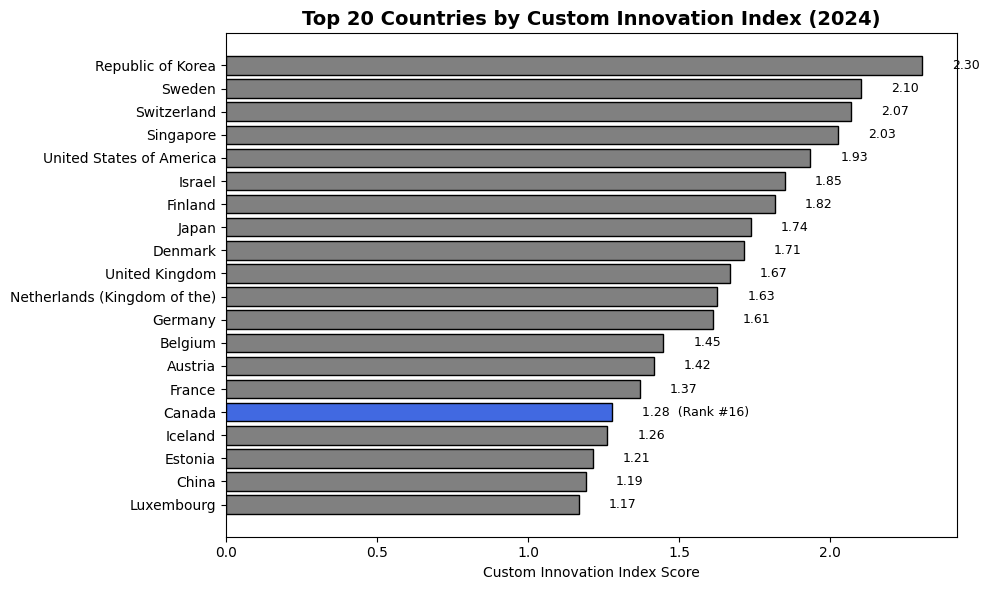

In [31]:
df_custom = pd.read_csv("Custom_Innovation_Index_Ranking.csv")

# Get top 20 countries for visualization
top_n = 20
df_top = df_custom.head(top_n).copy()
df_top["Color"] = df_top["ECONOMY_NAME"].apply(lambda x: "royalblue" if x == "Canada" else "gray")

# Extract Canada’s rank and score from the full ranking
canada_row = df_custom[df_custom["ECONOMY_NAME"] == "Canada"].iloc[0]
canada_rank = int(canada_row["Custom_Rank"])
canada_score = canada_row["Custom_Innovation_Index"]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(df_top["ECONOMY_NAME"], df_top["Custom_Innovation_Index"], color=df_top["Color"], edgecolor='black')
plt.xlabel("Custom Innovation Index Score")
plt.title("Top 20 Countries by Custom Innovation Index (2024)", fontsize=14, weight='bold')
plt.gca().invert_yaxis()

# Annotate each bar with score, add rank for Canada only
for i, bar in enumerate(bars):
    width = bar.get_width()
    country_name = df_top.iloc[i]["ECONOMY_NAME"]
    label = f"{width:.2f}"
    if country_name == "Canada":
        label += f"  (Rank #{canada_rank})"
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, label, va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

def load_and_prepare_gii_dataset(xlsx_path, year):
    """
    Loads a WIPO GII workbook for a single year, pivots to get indicators as columns,
    merges rank info, merges metadata, and returns a dataframe with a 'Year' column added.
    """

    df_year = pd.read_excel(xlsx_path, sheet_name="Data")
    df_year_valid = df_year[df_year["SCORE"].notnull()]
    
    # Pivot table so each indicator (NAME) becomes a column
    df_year_pivot = df_year_valid.pivot_table(
        index="ECONOMY_NAME",
        columns="NAME",
        values="SCORE"
    ).reset_index()
    
    # Rename the main target column
    df_year_pivot = df_year_pivot.rename(
        columns={"Global Innovation Index": "GII_Overall_Score"}
    )
    df_year_pivot = df_year_pivot.drop(
        columns=["Innovation inputs", "Innovation outputs"], 
        errors="ignore"
    )
    df_year_pivot["Year"] = year
    return df_year_pivot

df_2022 = load_and_prepare_gii_dataset("datasets/wipo-pub-2000-2022-tech1.xlsx", 2022)
df_2023 = load_and_prepare_gii_dataset("datasets/wipo-pub-2000-2023-tech1.xlsx", 2023)
df_2024 = load_and_prepare_gii_dataset("datasets/wipo-pub-2000-2024-tech1.xlsx", 2024)

# Concatenate all into a single DataFrame
df_all_years = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

print("Combined shape:", df_all_years.shape)
df_all_years.head(10)

Combined shape: (397, 148)


NAME,ECONOMY_NAME,"Applied tariff rate, weighted avg., %",Business environment,Business sophistication,Citable documents H-index,Cost of redundancy dismissal,Country-code TLDs/th pop. 15–69,Creative goods and services,"Creative goods exports, % total trade",Creative outputs,...,Policy stability for doing business†,"Public research–industry co-publications, %","Pupil–teacher ratio, secondary","QS university ranking, top 3*",Regulatory quality*,Rule of law*,State of cluster development†,Top-level domains (TLDs)/th pop. 15–69,"Trade, diversification and market scale",University–industry R&D collaboration†
0,Albania,92.884864,37.152096,30.439986,2.112251,74.603170,3.475532,36.225666,0.508892,14.629007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,34.282018,43.877769,16.803990,9.837055,81.518154,0.133181,1.254358,0.148585,5.740491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,40.297542,31.723249,13.236596,0.362100,80.468330,0.117003,30.346768,0.071401,11.085055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,55.498060,44.295924,31.181347,27.761014,55.775583,6.260540,17.014581,1.054064,24.191044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Armenia,79.883571,55.940766,23.453019,9.897405,90.099010,5.118676,19.679395,8.991811,18.204317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Australia,95.407503,56.570190,48.628414,68.980084,92.079208,54.836597,24.493422,7.385072,37.826280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Austria,90.426908,70.785886,52.827639,44.236572,100.000000,63.005059,30.302000,10.922649,37.988980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Azerbaijan,61.642950,69.636583,24.942521,5.310803,88.712872,1.484963,5.880985,1.271689,6.727934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bahrain,86.934023,77.542138,21.978533,4.043452,88.895177,0.927184,7.460983,10.202717,9.155696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Bangladesh,28.913325,46.349684,16.521553,12.190706,54.455442,0.059098,2.081882,0.725298,13.025123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_model = df_all_years.dropna(subset=["GII_Overall_Score"]).copy()
numeric_cols = []
for col in df_model.columns:
    if pd.api.types.is_numeric_dtype(df_model[col]) and col not in ["GII_Overall_Score", "Year"]:
        numeric_cols.append(col)

print("Numeric columns (potential features):", numeric_cols, len(numeric_cols))

Numeric columns (potential features): ['Applied tariff rate, weighted avg., %', 'Business environment', 'Business sophistication', 'Citable documents H-index', 'Cost of redundancy dismissal', 'Country-code TLDs/th pop. 15–69', 'Creative goods and services', 'Creative goods exports, % total trade', 'Creative outputs', 'Credit', 'Cultural and creative services exports, % total trade', 'Domestic credit to private sector, % GDP', 'Domestic industry diversification', 'Domestic market scale, bn PPP$', 'E-participation', 'Ecological sustainability', 'Education', 'Electricity output, GWh/mn pop.', 'Entertainment and media market/th pop. 15–69', 'Entrepreneurship policies and culture', 'Environmental performance', 'Expenditure on education, % GDP', 'FDI net inflows, % GDP', 'Females employed w/advanced degrees, %', 'Finance for startups and scaleups', 'Firms offering formal training, %', 'GDP/unit of energy use', 'GERD financed by abroad, % GDP', 'GERD financed by business, %', 'GERD performed 

In [34]:
selected_features = []
for c in numeric_cols:
    if "research" in c.lower() or "infrastructure" in c.lower() or "business" in c.lower():
        selected_features.append(c)

print("Selected features:", selected_features)
print("Total selected features:", len(selected_features))

Selected features: ['Business environment', 'Business sophistication', 'GERD financed by business, %', 'GERD performed by business, % GDP', 'General infrastructure', 'Human capital and research', 'Infrastructure', 'New businesses/th pop. 15–64', 'Policies for doing business', 'Research and development (R&D)', 'Research talent, % in businesses', 'Researchers, FTE/mn pop.', 'Operational stability for businesses', 'Operational stability for businesses*', 'Policy stability for doing business†', 'Public research–industry co-publications, %']
Total selected features: 16


In [35]:
df_model = df_model[["ECONOMY_NAME", "Year", "GII_Overall_Score"] + selected_features]
df_model.head(10)

NAME,ECONOMY_NAME,Year,GII_Overall_Score,Business environment,Business sophistication,"GERD financed by business, %","GERD performed by business, % GDP",General infrastructure,Human capital and research,Infrastructure,New businesses/th pop. 15–64,Policies for doing business,Research and development (R&D),"Research talent, % in businesses","Researchers, FTE/mn pop.",Operational stability for businesses,Operational stability for businesses*,Policy stability for doing business†,"Public research–industry co-publications, %"
0,Albania,2022,24.441161,37.152096,30.439986,NaN,NaN,21.396473,22.672535,46.321453,6.142581,37.152096,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,2022,16.696321,43.877769,16.803990,8.342606,0.734917,31.077974,26.130860,31.137739,1.291867,43.877769,3.151721,0.191100,9.252544,NaN,NaN,NaN,NaN
2,Angola,2022,13.920507,31.723249,13.236596,NaN,NaN,11.111149,10.906547,24.398129,NaN,39.289339,0.075740,NaN,0.050218,NaN,NaN,NaN,NaN
3,Argentina,2022,28.623141,44.295924,31.181347,32.729184,3.378468,25.957274,30.481442,44.037106,0.651476,12.432883,18.092716,13.425340,13.981857,NaN,NaN,NaN,NaN
4,Armenia,2022,26.591529,55.940766,23.453019,20.643816,NaN,18.901755,21.967067,39.857709,11.651976,53.254620,0.733052,NaN,NaN,NaN,NaN,NaN,NaN
5,Australia,2022,47.137525,56.570190,48.628414,NaN,18.685213,53.656644,61.682596,58.786235,58.923368,67.082469,65.733789,NaN,NaN,NaN,NaN,NaN,NaN
6,Austria,2022,50.189959,70.785886,52.827639,61.974569,45.215747,56.065766,58.788523,62.698209,2.026034,83.439143,54.867894,76.798475,65.950630,NaN,NaN,NaN,NaN
7,Azerbaijan,2022,21.452242,69.636583,24.942521,38.074973,0.084703,15.744914,23.771649,36.296297,5.210811,69.636583,3.953499,NaN,19.776667,NaN,NaN,NaN,NaN
8,Bahrain,2022,27.954319,77.542138,21.978533,26.928853,0.415210,64.280302,28.138025,55.769331,12.706786,77.542138,4.813765,0.129158,4.075602,NaN,NaN,NaN,NaN
9,Bangladesh,2022,19.674446,46.349684,16.521553,NaN,NaN,23.915834,10.842093,35.475020,0.000000,46.349684,4.450000,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for col in selected_features:
    na_count = df_model[col].isna().sum()
    total = len(df_model)
    print(f"{col}: NaNs={na_count} of {total}, ratio={na_count/total:.2%}")

Business environment: NaNs=4 of 397, ratio=1.01%
Business sophistication: NaNs=0 of 397, ratio=0.00%
GERD financed by business, %: NaNs=96 of 397, ratio=24.18%
GERD performed by business, % GDP: NaNs=119 of 397, ratio=29.97%
General infrastructure: NaNs=0 of 397, ratio=0.00%
Human capital and research: NaNs=0 of 397, ratio=0.00%
Infrastructure: NaNs=0 of 397, ratio=0.00%
New businesses/th pop. 15–64: NaNs=275 of 397, ratio=69.27%
Policies for doing business: NaNs=140 of 397, ratio=35.26%
Research and development (R&D): NaNs=0 of 397, ratio=0.00%
Research talent, % in businesses: NaNs=143 of 397, ratio=36.02%
Researchers, FTE/mn pop.: NaNs=74 of 397, ratio=18.64%
Operational stability for businesses: NaNs=265 of 397, ratio=66.75%
Operational stability for businesses*: NaNs=264 of 397, ratio=66.50%
Policy stability for doing business†: NaNs=267 of 397, ratio=67.25%
Public research–industry co-publications, %: NaNs=264 of 397, ratio=66.50%


In [37]:
df_model = df_model.iloc[:, :-4]
selected_features = selected_features[:-4]
df_model.head()

NAME,ECONOMY_NAME,Year,GII_Overall_Score,Business environment,Business sophistication,"GERD financed by business, %","GERD performed by business, % GDP",General infrastructure,Human capital and research,Infrastructure,New businesses/th pop. 15–64,Policies for doing business,Research and development (R&D),"Research talent, % in businesses","Researchers, FTE/mn pop."
0,Albania,2022,24.441161,37.152096,30.439986,NaN,NaN,21.396473,22.672535,46.321453,6.142581,37.152096,0.000000,NaN,NaN
1,Algeria,2022,16.696321,43.877769,16.803990,8.342606,0.734917,31.077974,26.130860,31.137739,1.291867,43.877769,3.151721,0.19110,9.252544
2,Angola,2022,13.920507,31.723249,13.236596,NaN,NaN,11.111149,10.906547,24.398129,NaN,39.289339,0.075740,NaN,0.050218
3,Argentina,2022,28.623141,44.295924,31.181347,32.729184,3.378468,25.957274,30.481442,44.037106,0.651476,12.432883,18.092716,13.42534,13.981857
4,Armenia,2022,26.591529,55.940766,23.453019,20.643816,NaN,18.901755,21.967067,39.857709,11.651976,53.254620,0.733052,NaN,NaN


In [38]:
df_model_refined = df_model.copy()
for col in selected_features:
		df_model_refined[col] = df_model_refined[col].fillna(0)

In [39]:
df_model_refined.isna().any().any()

False

In [40]:
X = df_model_refined[selected_features]
y = df_model_refined["GII_Overall_Score"]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (397, 12)
y shape: (397,)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Selected Features:", selected_features)
print("Coefficients:")
for feat, coef_val in zip(selected_features, model.coef_):
    print(f"  {feat}: {coef_val:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Test MSE: {mse:.3f}, R^2: {r2:.3f}")


Selected Features: ['Business environment', 'Business sophistication', 'GERD financed by business, %', 'GERD performed by business, % GDP', 'General infrastructure', 'Human capital and research', 'Infrastructure', 'New businesses/th pop. 15–64', 'Policies for doing business', 'Research and development (R&D)', 'Research talent, % in businesses', 'Researchers, FTE/mn pop.']
Coefficients:
  Business environment: 0.024
  Business sophistication: 0.362
  GERD financed by business, %: -0.002
  GERD performed by business, % GDP: -0.010
  General infrastructure: -0.079
  Human capital and research: 0.155
  Infrastructure: 0.339
  New businesses/th pop. 15–64: 0.002
  Policies for doing business: -0.011
  Research and development (R&D): 0.122
  Research talent, % in businesses: 0.028
  Researchers, FTE/mn pop.: -0.017
Intercept: 0.329
Test MSE: 8.702, R^2: 0.935


In [42]:
df_can_2024 = df_model_refined[
    (df_model_refined["ECONOMY_NAME"] == "Canada") &
    (df_model_refined["Year"] == 2024)
]

if df_can_2024.empty:
    print("No data for Canada 2024 found. Check spelling or year.")
else:
    # Confirm we have a single row
    print(df_can_2024[selected_features + ["GII_Overall_Score"]])

NAME  Business environment  Business sophistication  \
289              62.682858                56.839945   

NAME  GERD financed by business, %  GERD performed by business, % GDP  \
289                      57.957346                          24.241412   

NAME  General infrastructure  Human capital and research  Infrastructure  \
289                60.026701                   58.363236       54.729472   

NAME  New businesses/th pop. 15–64  Policies for doing business  \
289                            0.0                          0.0   

NAME  Research and development (R&D)  Research talent, % in businesses  \
289                        58.621353                         75.920311   

NAME  Researchers, FTE/mn pop.  GII_Overall_Score  
289                   54.55964          52.905269  


In [43]:
df_2024_refined = df_model_refined[df_model_refined["Year"] == 2024].copy()
df_2024_refined

NAME,ECONOMY_NAME,Year,GII_Overall_Score,Business environment,Business sophistication,"GERD financed by business, %","GERD performed by business, % GDP",General infrastructure,Human capital and research,Infrastructure,New businesses/th pop. 15–64,Policies for doing business,Research and development (R&D),"Research talent, % in businesses","Researchers, FTE/mn pop."
264,Albania,2024,24.537930,53.239174,26.848755,0.000000,0.000000,20.759959,21.568990,52.296159,0.0,0.0,0.000000,0.000000,0.000000
265,Algeria,2024,16.162259,48.968077,17.963561,8.342606,0.858601,31.262053,28.063178,29.881129,0.0,0.0,4.242947,0.189217,8.249440
266,Angola,2024,10.216209,20.964731,6.810525,0.000000,0.000000,11.494742,12.362696,22.620012,0.0,0.0,0.103130,0.000000,0.044740
267,Argentina,2024,26.424646,1.052496,27.725225,25.539663,5.199093,17.929559,33.949110,36.706580,0.0,0.0,24.537091,13.597495,12.681309
268,Armenia,2024,29.018772,46.359244,22.701065,20.643816,0.000000,17.771645,25.222255,36.248577,0.0,0.0,3.869349,0.000000,12.157900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,Uruguay,2024,29.130889,64.318758,25.611025,5.195473,2.735387,24.316996,26.244234,46.502952,0.0,0.0,7.756803,2.343492,8.310815
393,Uzbekistan,2024,24.704469,79.100357,25.160313,52.483962,1.249839,35.658800,25.107632,40.432235,0.0,0.0,1.968084,15.302655,5.375600
394,Viet Nam,2024,36.181335,57.260131,31.382310,79.317701,9.282075,41.147089,29.323313,44.892874,0.0,0.0,19.197345,28.857692,7.713724
395,Zambia,2024,15.664772,44.365369,20.858363,0.000000,0.000000,27.686578,22.605757,31.889707,0.0,0.0,0.000000,0.000000,0.000000


In [44]:
annual_growth = {
		"Business sophistication": 0.02,
		"Human capital and research": 0.02,
		"Research and development (R&D)": 0.03,
		"Research talent, % in businesses": 0.02,
    "Business environment": 0.02,
}

In [45]:
df_2024 = df_model_refined[df_model_refined["Year"] == 2024].copy()

scenario_dfs = []

df_2024["Predicted_GII"] = df_2024["GII_Overall_Score"]
scenario_dfs.append(df_2024.assign(ScenarioYear=2024))

# Identify Canada row in 2024
can_2024_row = df_2024[df_2024["ECONOMY_NAME"] == "Canada"].copy()
if can_2024_row.empty:
    raise ValueError("No 2024 row for Canada found in df_2024. Check spelling or data.")

can_2024_values = can_2024_row.iloc[0][selected_features]


In [46]:
current_can_values = can_2024_values.copy()

years_to_project = [2025, 2026, 2027, 2028, 2029, 2030]
previous_year_df = df_2024

# Set a baseline growth for ALL countries (including Canada), e.g., 1% per year
baseline_growth = 0.01 

for yr in years_to_project:

    df_new_year = previous_year_df.copy()
    df_new_year["Year"] = yr

    for col in selected_features:
        df_new_year[col] = df_new_year[col] * (1.0 + baseline_growth)


    canada_mask = df_new_year["ECONOMY_NAME"] == "Canada"

    # For each selected feature, increment if in annual_growth dictionary, else use baseline
    for col in selected_features:
        # get last year's Canada-only value from our stored dictionary
        can_old_val = current_can_values[col]
        # figure out the bigger growth rate for Canada from annual_growth dictionary
        bigger_growth_rate = annual_growth.get(col, baseline_growth)
        can_new_val = can_old_val * (1.0 + bigger_growth_rate)
        # overwrite in df_new_year for Canada
        df_new_year.loc[canada_mask, col] = can_new_val
        # store it so next iteration sees the updated value
        current_can_values[col] = can_new_val

    # Predict GII_Overall_Score for EVERY country
    X_new_year = df_new_year[selected_features].fillna(0)
    df_new_year["Predicted_GII"] = model.predict(X_new_year)

    # Compute rank
    df_new_year["Predicted_Rank"] = df_new_year["Predicted_GII"].rank(
        ascending=False, method="dense"
    )

    # Save
    scenario_dfs.append(df_new_year.assign(ScenarioYear=yr))
    previous_year_df = df_new_year

In [47]:
df_scenario_all = pd.concat(scenario_dfs, ignore_index=True)

In [48]:
df_canada_scenario = df_scenario_all[df_scenario_all["ECONOMY_NAME"] == "Canada"].copy()
df_canada_scenario = df_canada_scenario.sort_values("ScenarioYear")

print(df_canada_scenario[[
    "ScenarioYear", "Predicted_GII", "Predicted_Rank"
]])

NAME  ScenarioYear  Predicted_GII  Predicted_Rank
25            2024      52.905269             NaN
158           2025      54.303283            13.0
291           2026      55.329726            12.0
424           2027      56.377642            12.0
557           2028      57.447516            12.0
690           2029      58.539841            11.0
823           2030      59.655124            10.0


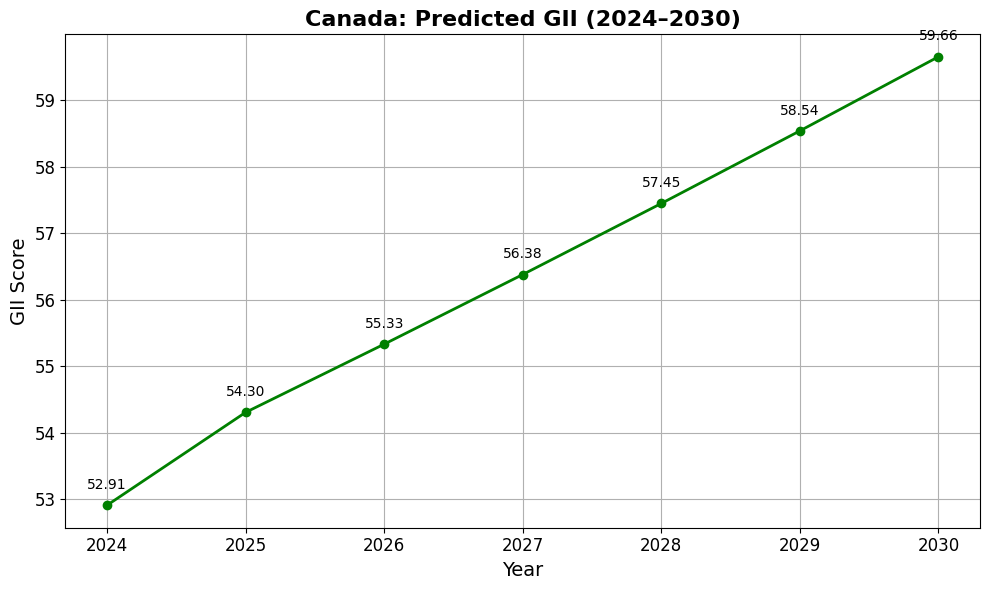

posx and posy should be finite values
posx and posy should be finite values


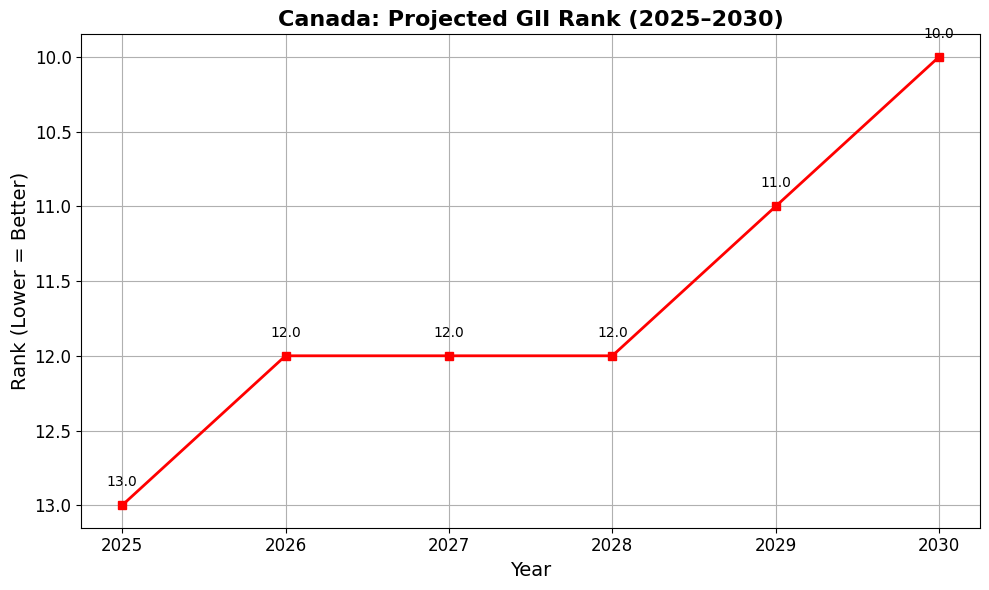

In [49]:
import matplotlib.pyplot as plt

# 1) Canada Predicted GII (2024–2030)
plt.figure(figsize=(10, 6))
plt.plot(
    df_canada_scenario["ScenarioYear"], 
    df_canada_scenario["Predicted_GII"],
    marker='o',
    color='green',
    linewidth=2,
    markersize=6
)

plt.title("Canada: Predicted GII (2024–2030)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("GII Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for x_val, y_val in zip(df_canada_scenario["ScenarioYear"], df_canada_scenario["Predicted_GII"]):
    plt.text(x_val, y_val + 0.2, f"{y_val:.2f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

# 2) Canada Projected GII Rank (2024–2030)
plt.figure(figsize=(10, 6))
plt.plot(
    df_canada_scenario["ScenarioYear"],
    df_canada_scenario["Predicted_Rank"],
    marker='s',
    color='red',
    linewidth=2,
    markersize=6
)

plt.gca().invert_yaxis()
plt.title("Canada: Projected GII Rank (2025–2030)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Rank (Lower = Better)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for x_val, y_val in zip(df_canada_scenario["ScenarioYear"], df_canada_scenario["Predicted_Rank"]):
    
    plt.text(x_val, y_val - 0.2, y_val, ha="center", va="top", fontsize=10)

plt.tight_layout()
plt.show()
